In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from ast import literal_eval

In [50]:
df = pd.read_csv('merge.csv')

In [150]:
def plot_corr(entry,outdir = './'):
    edge_dim1_x,edge_dim1_y = np.array(literal_eval(literal_eval(entry['bin_edges_dim1'])[0])),np.array(literal_eval(literal_eval(entry['bin_edges_dim1'])[1]))
    edge_dim2_x,edge_dim2_y = np.array(literal_eval(literal_eval(entry['bin_edges_dim2'])[0])), np.array(literal_eval(literal_eval(entry['bin_edges_dim2'])[1]))
    obs2_x, obs2_y = literal_eval(entry['obs2'])
    values = np.array(literal_eval(entry['bin_values']))
    f, axs = plt.subplots(len(edge_dim1_y)-1,len(edge_dim1_x)-1,sharex=True, sharey=True,figsize=(11*(len(edge_dim1_x)-1),11*(len(edge_dim1_y)-1)))
    if len(edge_dim1_y)-1==1: axs = np.array([axs])
    if len(edge_dim1_x)-1==1:    axs = axs.reshape(len(axs),1)
    x_start = 0
    for ix in range(len(edge_dim2_x)):
        y_start = 0
        for iy in range(len(edge_dim2_y)):
            values_draw = values[x_start:x_start+len(edge_dim2_x[ix])-1,y_start:y_start+len(edge_dim2_y[iy])-1]
            pcm = axs[len(edge_dim2_y)-1-iy,ix].pcolormesh(edge_dim2_x[ix],edge_dim2_y[iy],values_draw.T,
                                                           cmap=sns.diverging_palette(0, 255, n=200,as_cmap=True).reversed(),vmin=-1, vmax=1)
            axs[len(edge_dim2_y)-1-iy,ix].tick_params(axis='both', which='major', labelsize=1)
            axs[len(edge_dim2_y)-1-iy,ix].set_xticks(edge_dim2_x[ix][1:-1],minor=True)
            axs[len(edge_dim2_y)-1-iy,ix].set_yticks(edge_dim2_y[iy][1:-1],minor=True)
            axs[len(edge_dim2_y)-1-iy,ix].grid(linestyle="--",linewidth=1,which='minor')
            text_posx = (edge_dim2_x[ix][1:]+edge_dim2_x[ix][:-1])/2
            text_posy = (edge_dim2_y[iy][1:]+edge_dim2_y[iy][:-1])/2
            for iposx in range(len(text_posx)):
                for iposy in range(len(text_posy)):
                    axs[len(edge_dim2_y)-1-iy,ix].text(text_posx[iposx],text_posy[iposy],'{:0.2f}'.format(values_draw[iposx,iposy]),ha='center', va='center')
            y_start += len(edge_dim2_y[iy])-1
        x_start += len(edge_dim2_x[ix])-1
    axs[-1,-1].set_xlabel(obs2_x,fontsize=25)
    axs[0,0].set_ylabel(obs2_y,fontsize=25)
    f.colorbar(pcm,ax=axs)
    if 'sys' in entry['datatype']: 
        f.suptitle("correlation of systematic uncertainty",fontsize=30)
        tag='sys'
    else:
        f.suptitle("correlation of statistical uncertainty",fontsize=30)
        tag='stat'
    f.savefig(outdir+"corr_"+tag+"_"+obs2_x+"_"+obs2_y+"_iter"+str(entry['iter'])+".png")
    f.savefig(outdir+"corr_"+tag+"_"+obs2_x+"_"+obs2_y+"_iter"+str(entry['iter'])+".pdf")
    plt.close()

In [20]:
df

obs1                     obs2    datatype  \
0                nparticle               spherocity      unfold   
1                nparticle               spherocity      unfold   
2                nparticle               spherocity      unfold   
3                nparticle               spherocity      unfold   
4                nparticle               spherocity      unfold   
5                nparticle               spherocity      unfold   
6                nparticle               spherocity      unfold   
7                nparticle               spherocity      unfold   
8                nparticle               spherocity      unfold   
9                nparticle               spherocity      unfold   
10               nparticle               spherocity      unfold   
11               nparticle               spherocity      unfold   
12               nparticle               spherocity      unfold   
13               nparticle               spherocity      unfold   
14               nparticle               spherocity      unfold   
15               nparticle               spherocity      unfold   
16               nparticle               spherocity      unfold   
17               nparticle               spherocity      unfold   
18               nparticle               spherocity      unfold   
19               nparticle               spherocity      unfold   
20               nparticle               spherocity      unfold   
21               nparticle               spherocity      unfold   
22               nparticle               spherocity      unfold   
23               nparticle               spherocity      unfold   
24               nparticle               spherocity      unfold   
25               nparticle               spherocity      unfold   
26               nparticle               spherocity      unfold   
27               nparticle               spherocity      unfold   
28               nparticle               spherocity      unfold   
29               nparticle               spherocity      unfold   
..                     ...                      ...         ...   
648  (nparticle,nparticle)  (broadening,broadening)  unfold_sys   
649  (nparticle,nparticle)  (broadening,broadening)  unfold_sys   
650  (nparticle,nparticle)    (broadening,isotropy)  unfold_sys   
651  (nparticle,nparticle)    (broadening,isotropy)  unfold_sys   
652  (nparticle,nparticle)  (broadening,broadening)  unfold_sys   
653  (nparticle,nparticle)  (broadening,broadening)  unfold_sys   
654  (nparticle,nparticle)    (broadening,isotropy)  unfold_sys   
655  (nparticle,nparticle)    (broadening,isotropy)  unfold_sys   
656  (nparticle,nparticle)  (broadening,broadening)  unfold_sys   
657  (nparticle,nparticle)  (broadening,broadening)  unfold_sys   
658  (nparticle,nparticle)    (broadening,isotropy)  unfold_sys   
659  (nparticle,nparticle)    (broadening,isotropy)  unfold_sys   
660  (nparticle,nparticle)  (broadening,broadening)  unfold_sys   
661  (nparticle,nparticle)  (broadening,broadening)  unfold_sys   
662  (nparticle,nparticle)    (broadening,isotropy)  unfold_sys   
663  (nparticle,nparticle)    (broadening,isotropy)  unfold_sys   
664  (nparticle,nparticle)  (broadening,broadening)  unfold_sys   
665  (nparticle,nparticle)  (broadening,broadening)  unfold_sys   
666  (nparticle,nparticle)    (broadening,isotropy)  unfold_sys   
667  (nparticle,nparticle)    (broadening,isotropy)  unfold_sys   
668  (nparticle,nparticle)      (isotropy,isotropy)  unfold_sys   
669  (nparticle,nparticle)      (isotropy,isotropy)  unfold_sys   
670  (nparticle,nparticle)      (isotropy,isotropy)  unfold_sys   
671  (nparticle,nparticle)      (isotropy,isotropy)  unfold_sys   
672  (nparticle,nparticle)      (isotropy,isotropy)  unfold_sys   
673  (nparticle,nparticle)      (isotropy,isotropy)  unfold_sys   
674  (nparticle,nparticle)      (isotropy,isotropy)  unfold_sys   
675  (nparticle,nparticle)      (isotropy,isotropy)  unfold_sys   
67

In [131]:
entry = df.iloc[667]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


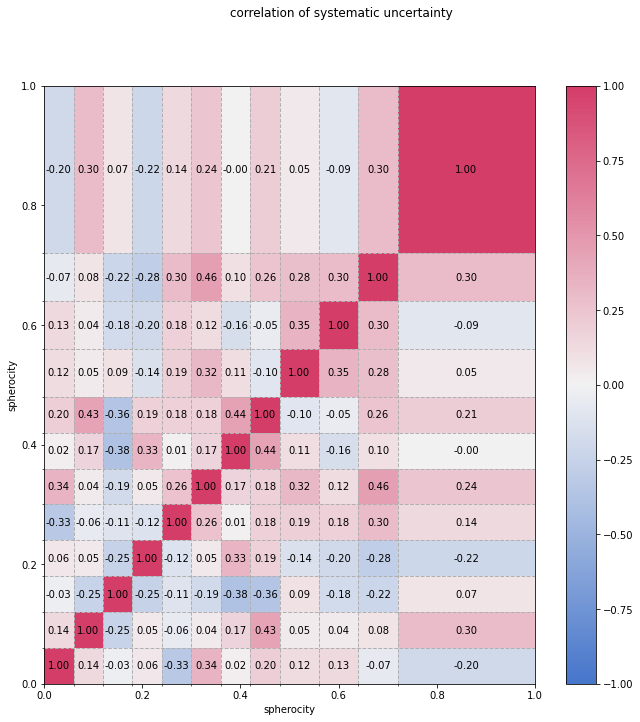

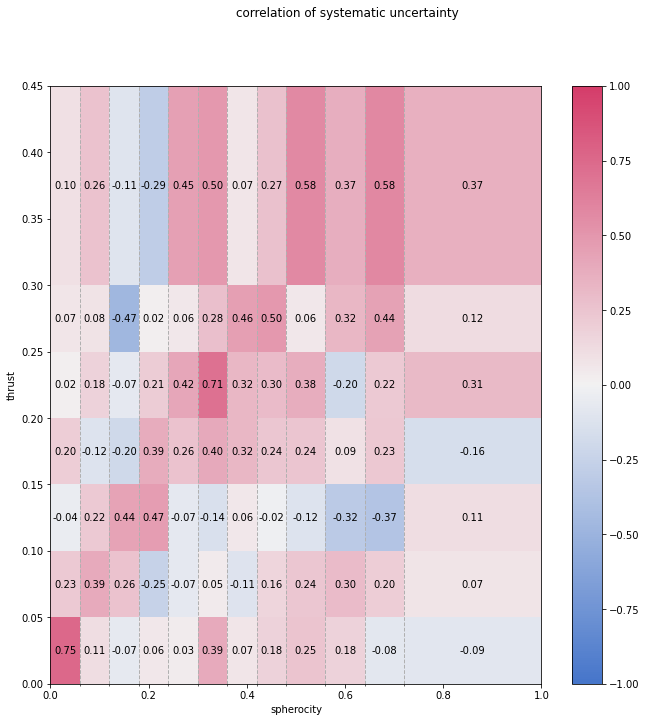

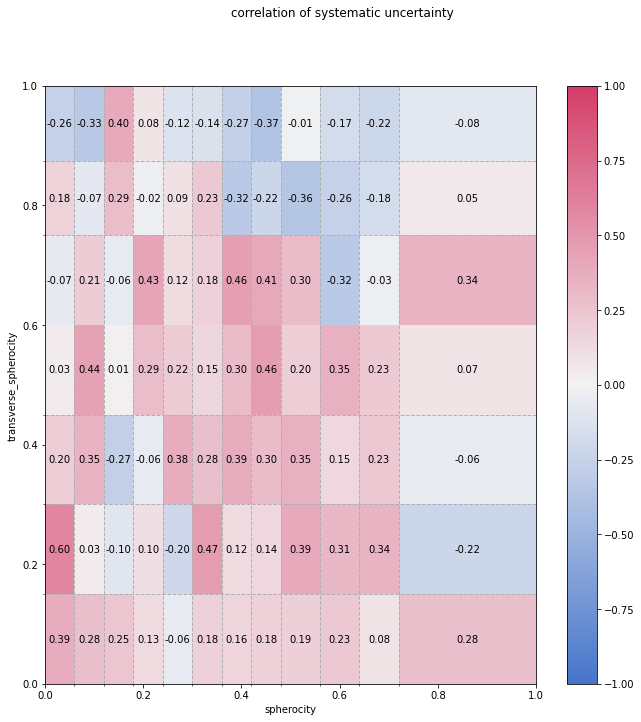

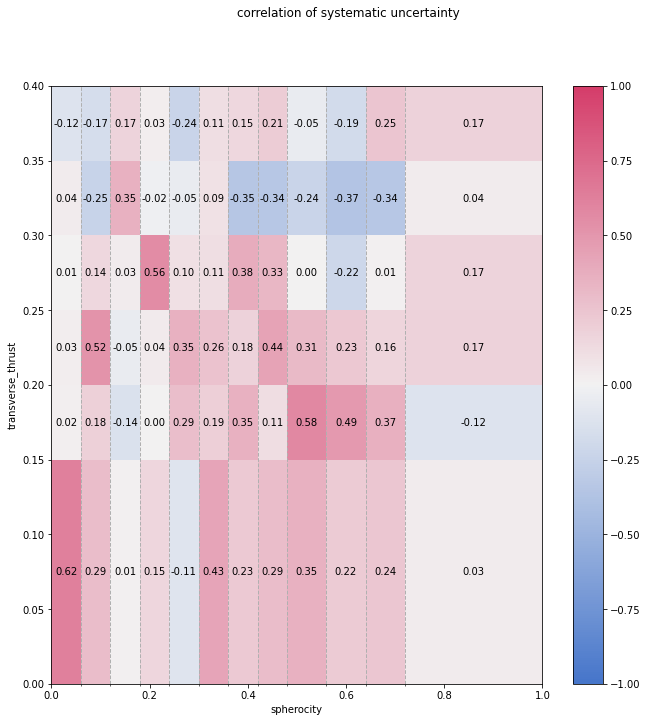

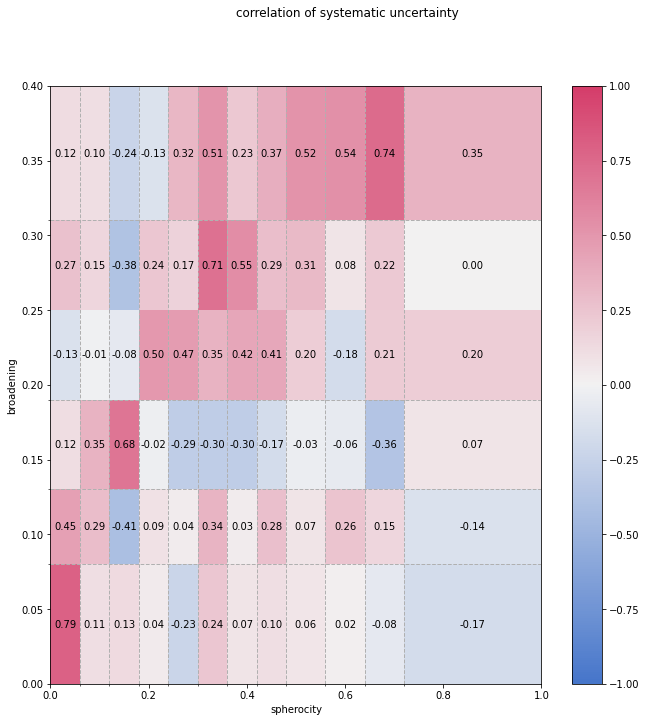

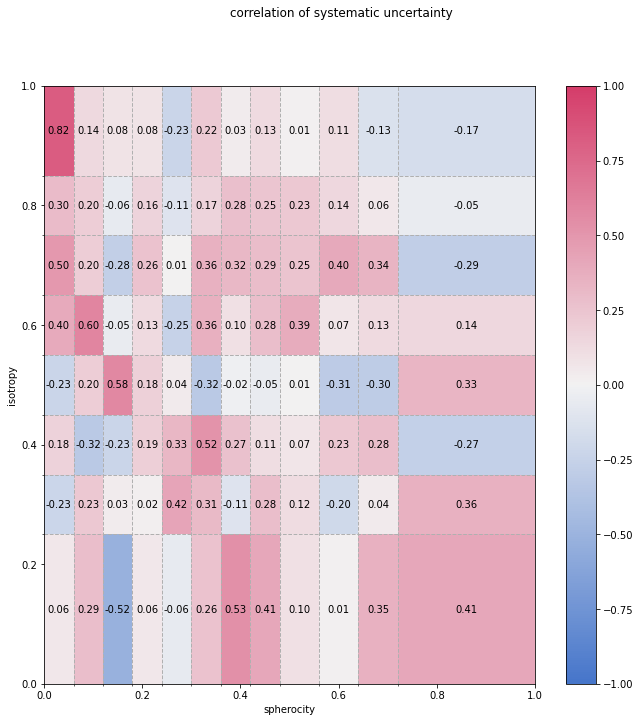

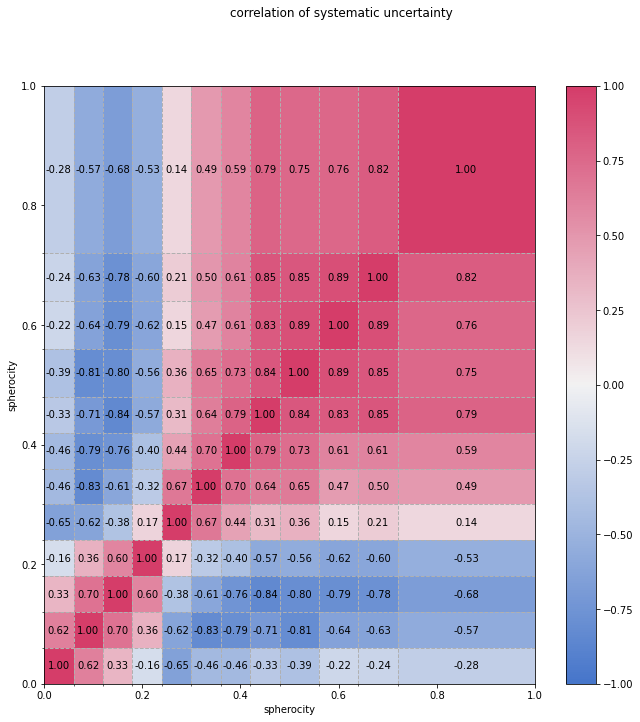

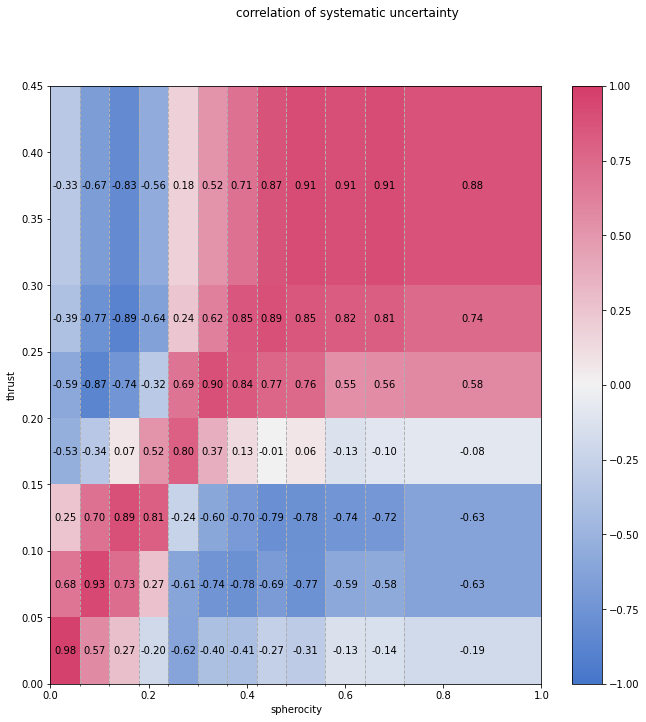

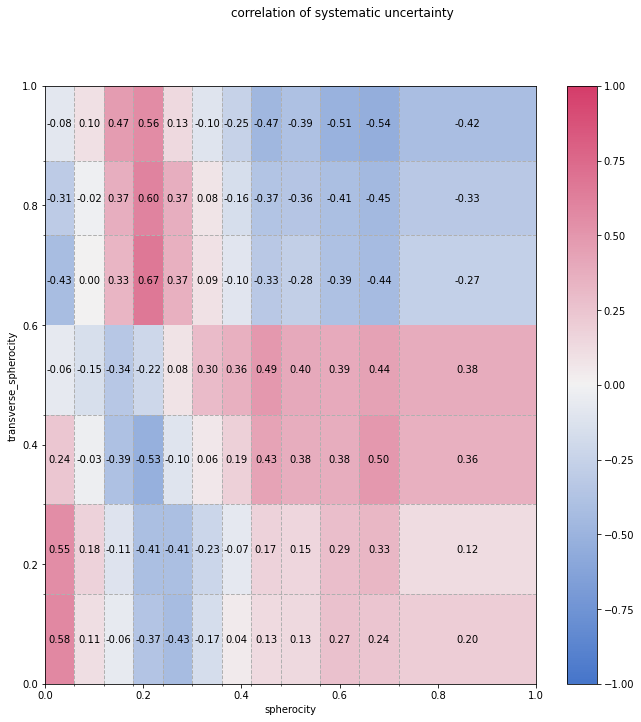

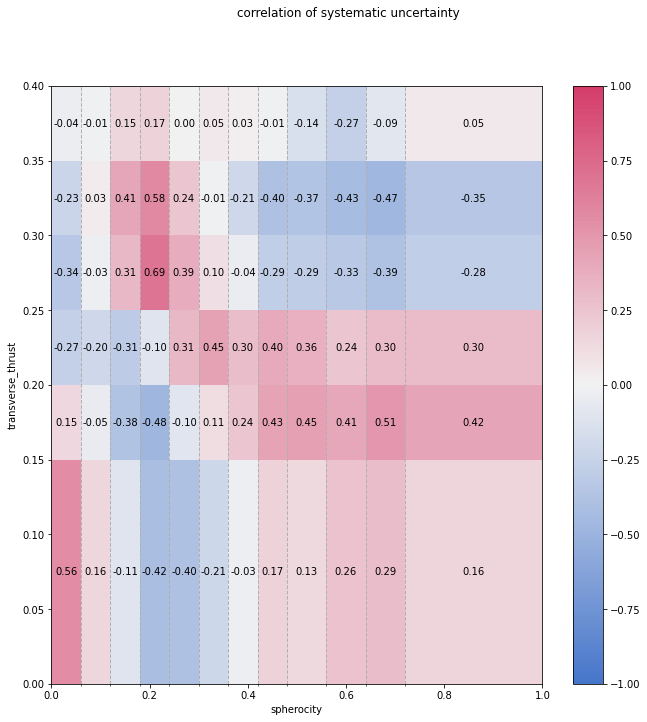

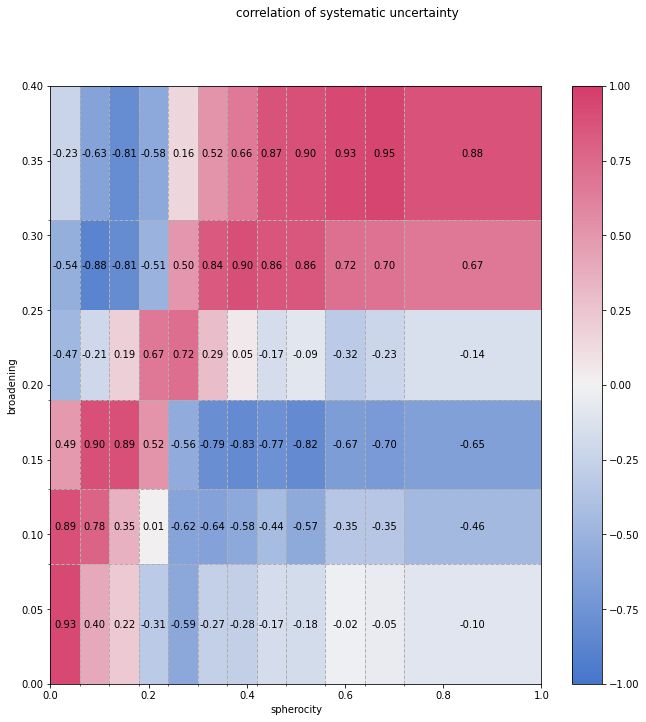

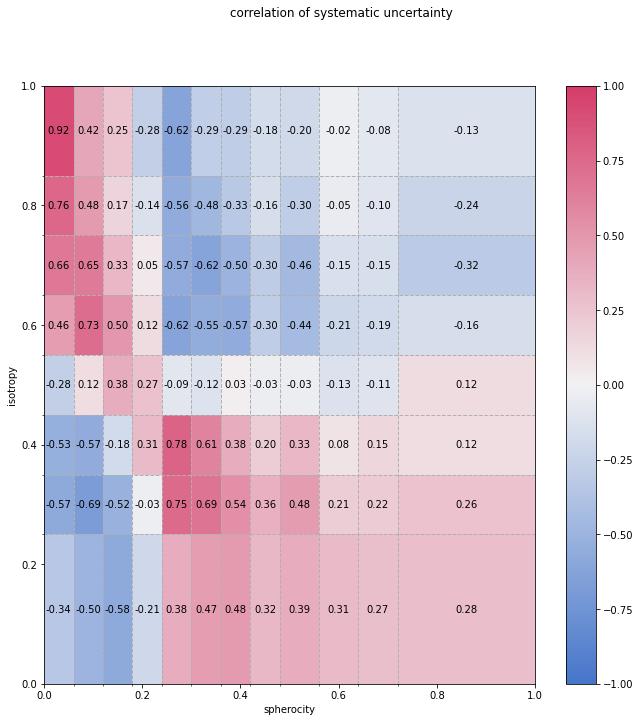

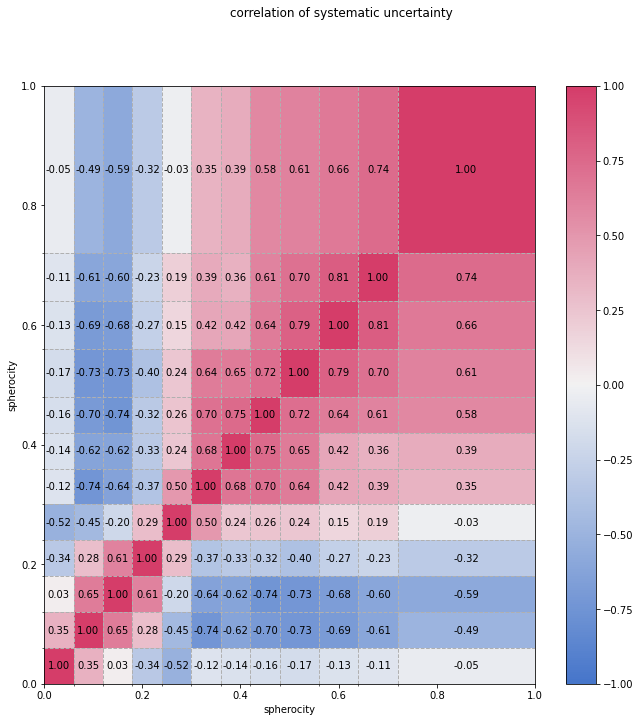

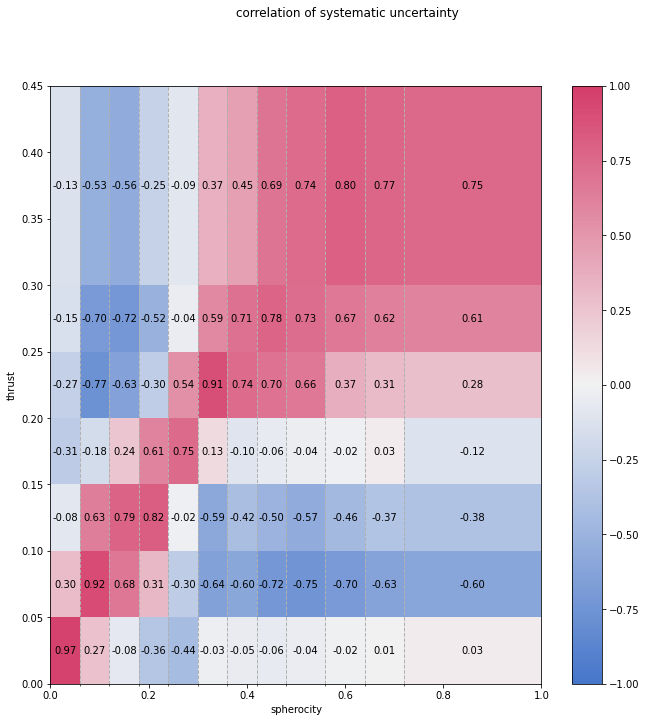

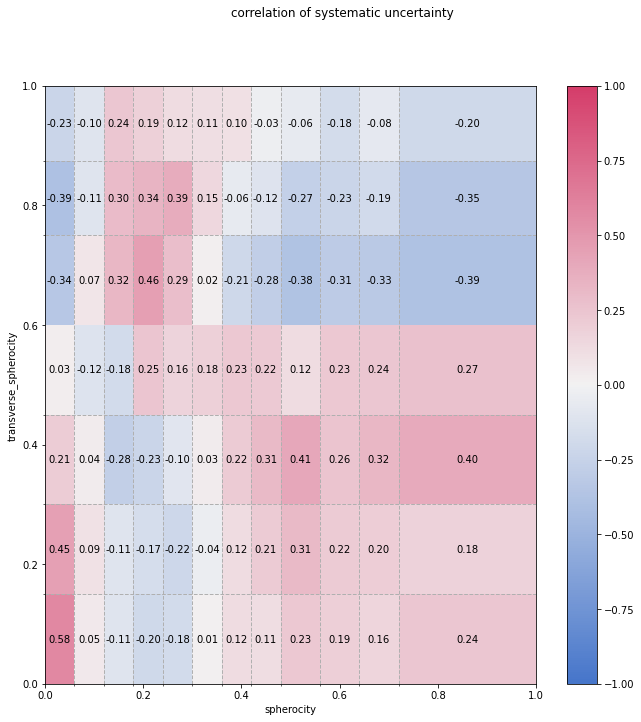

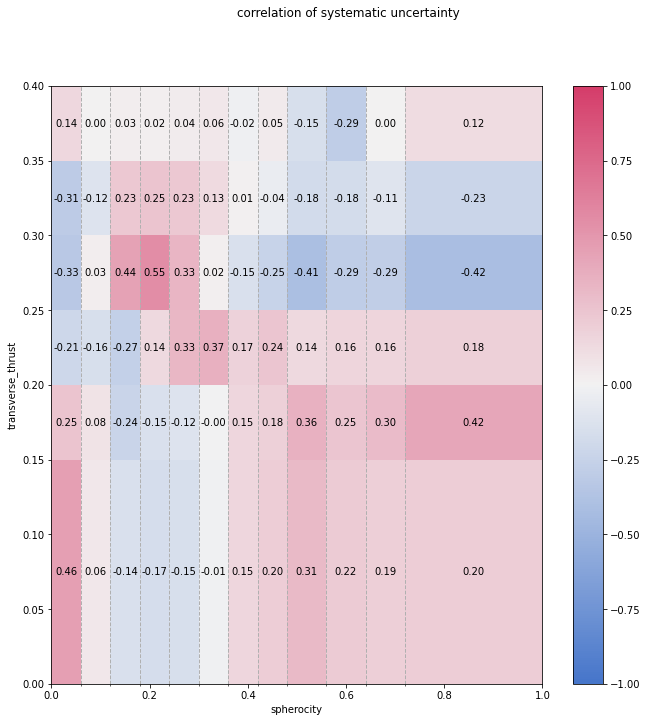

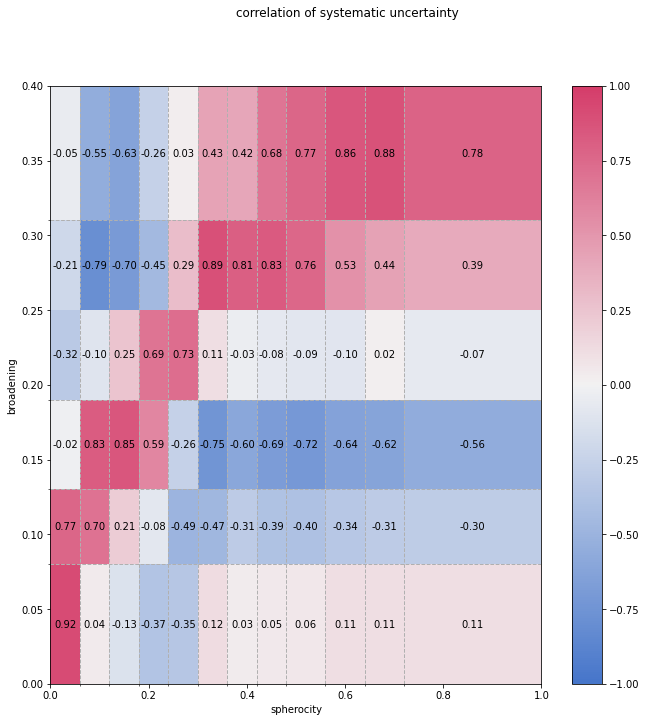

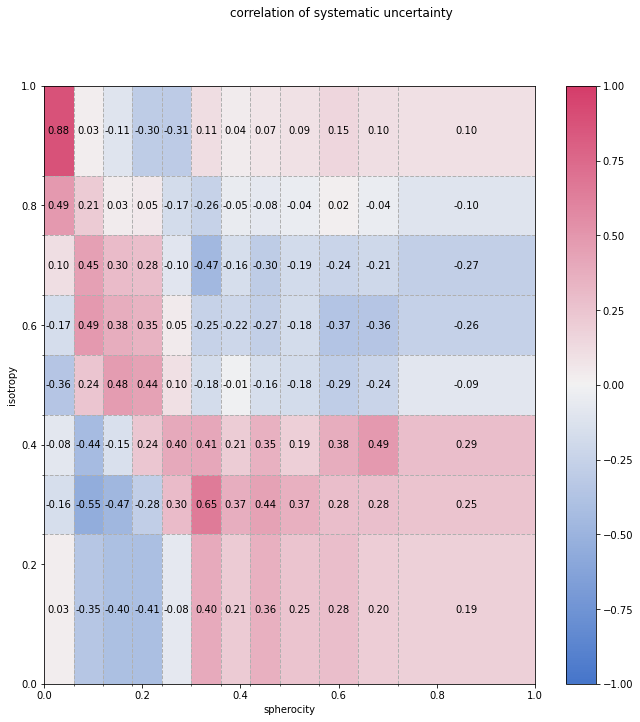

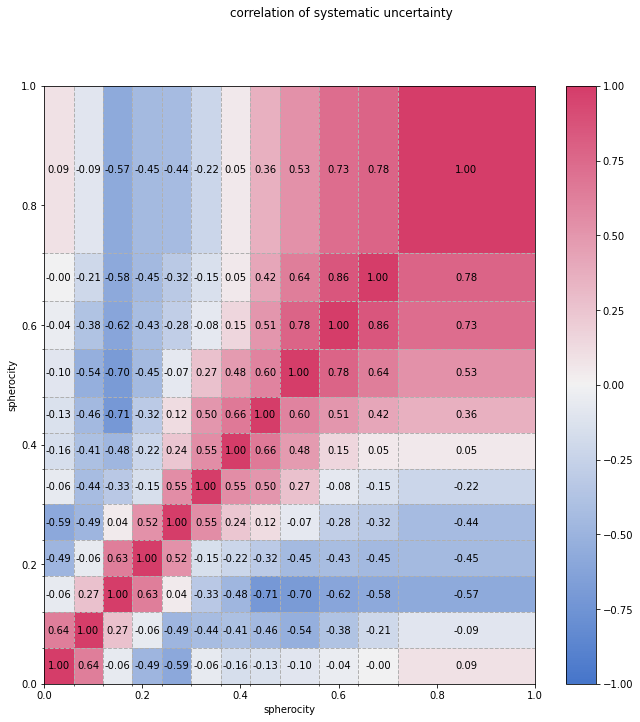

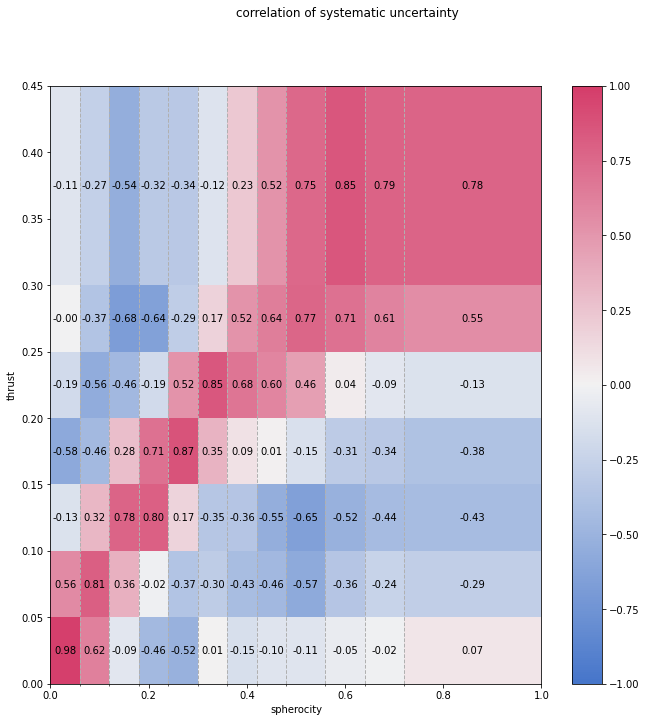

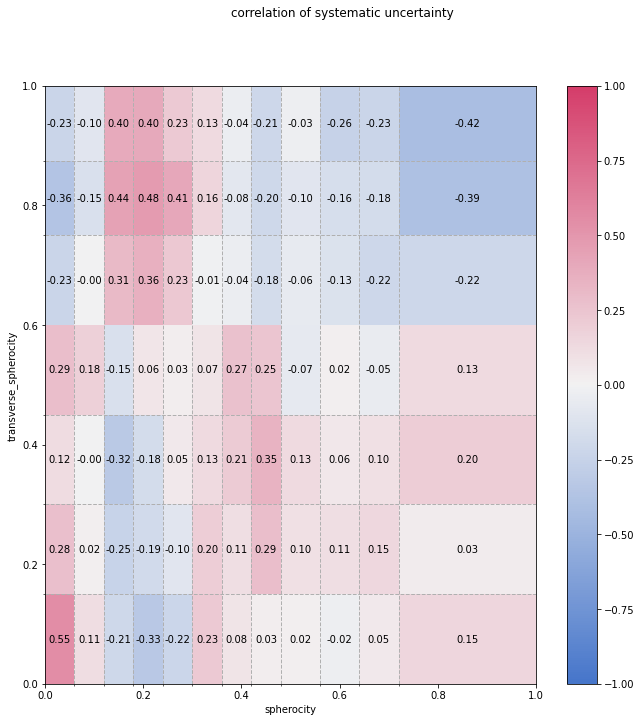

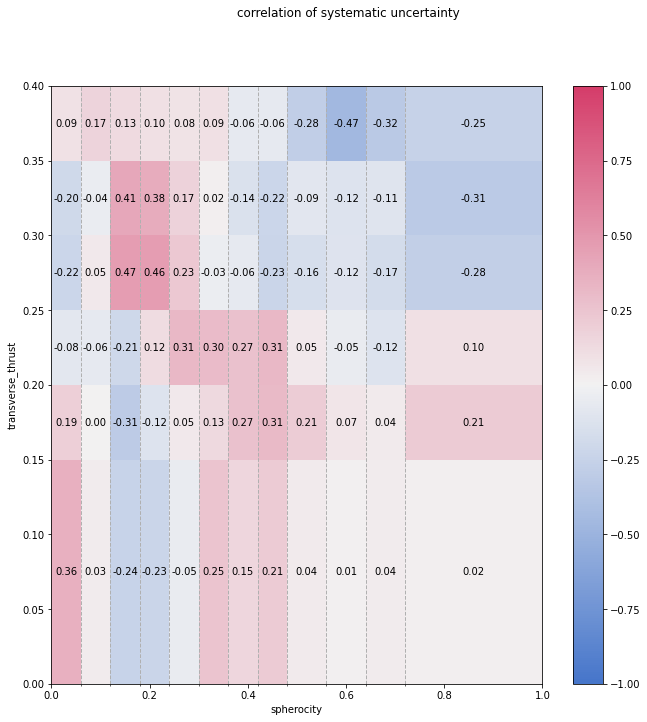

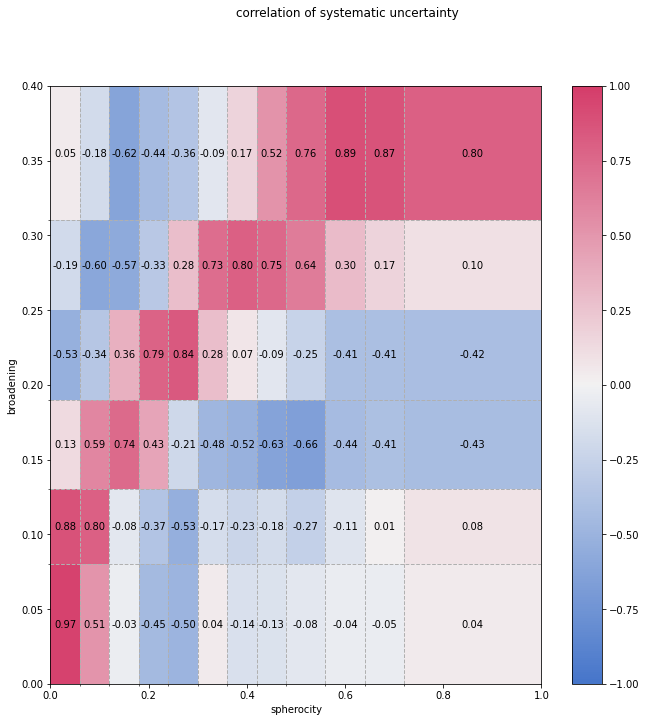

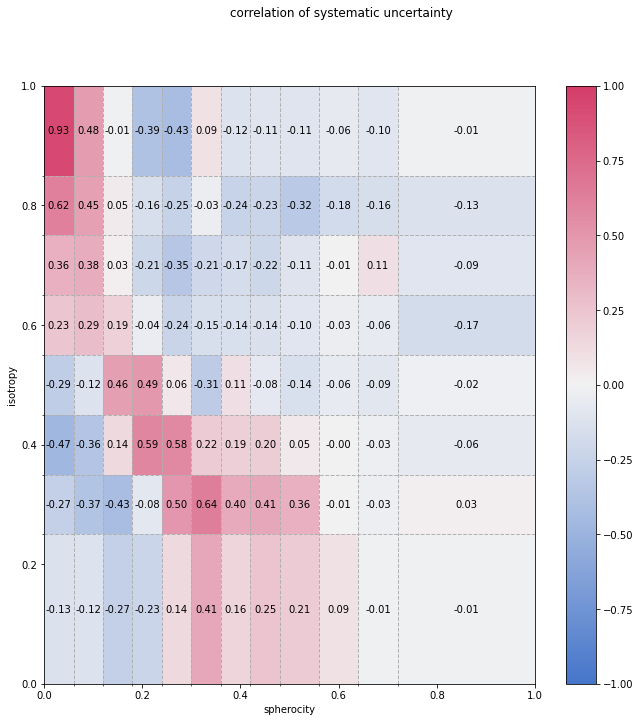

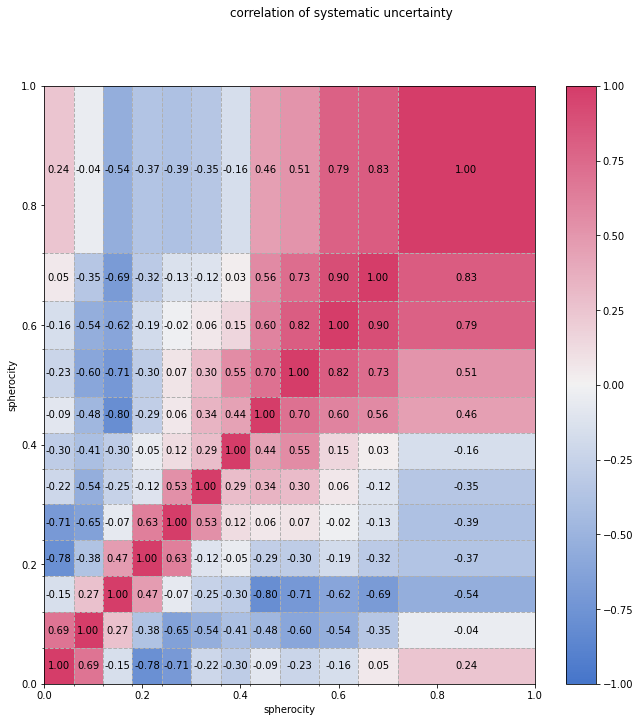

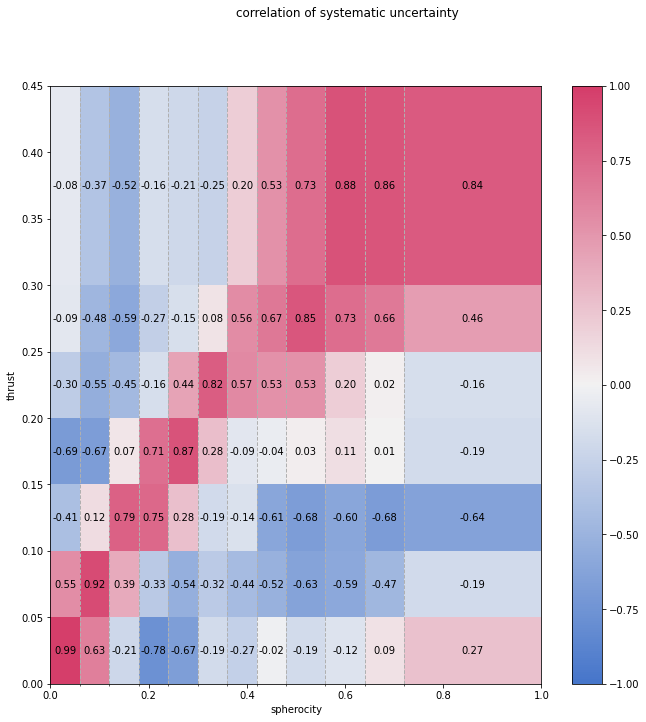

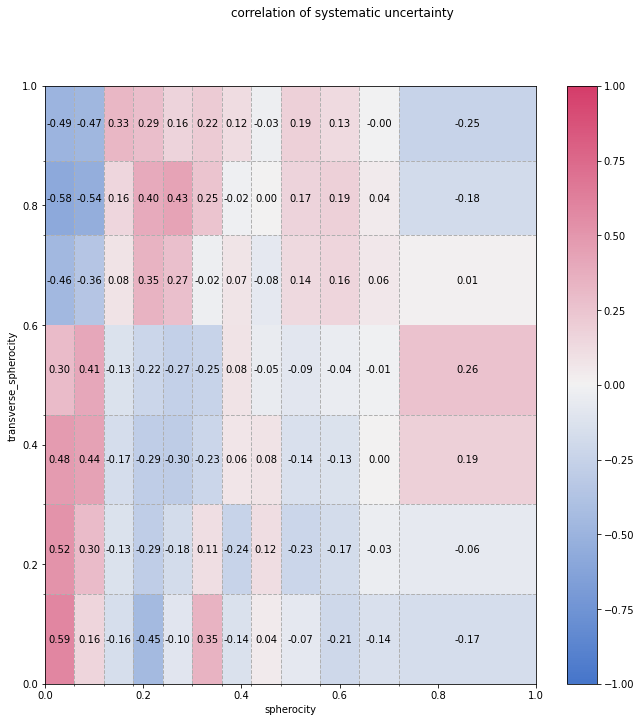

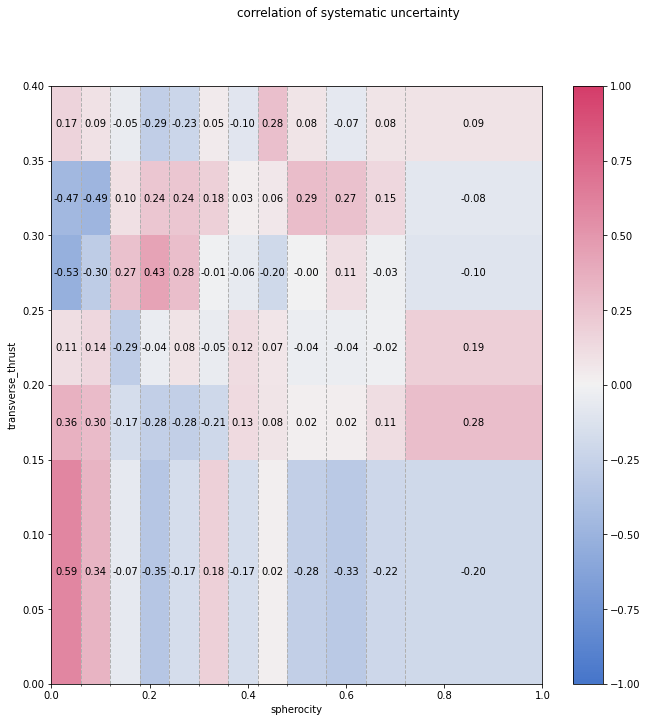

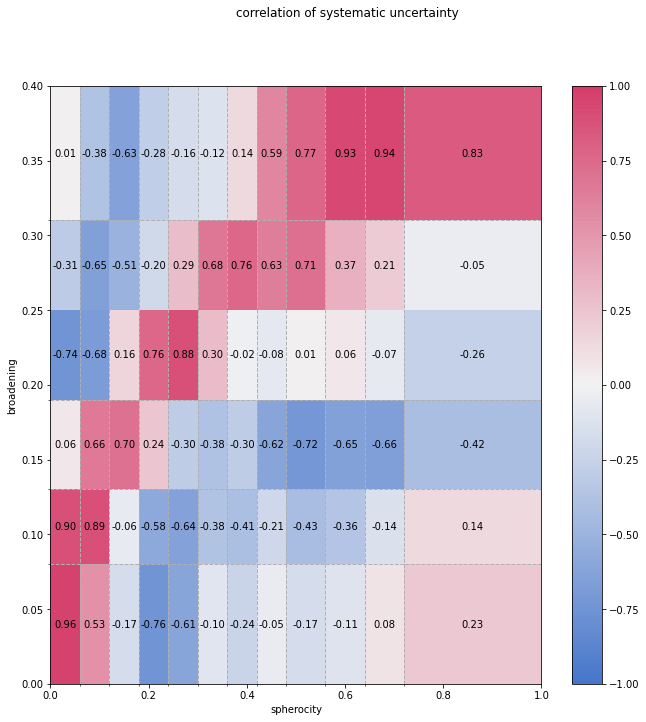

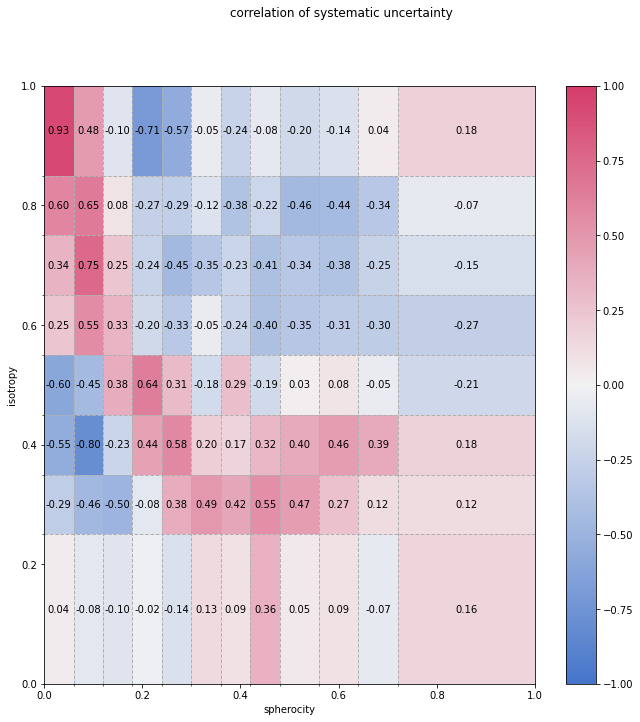

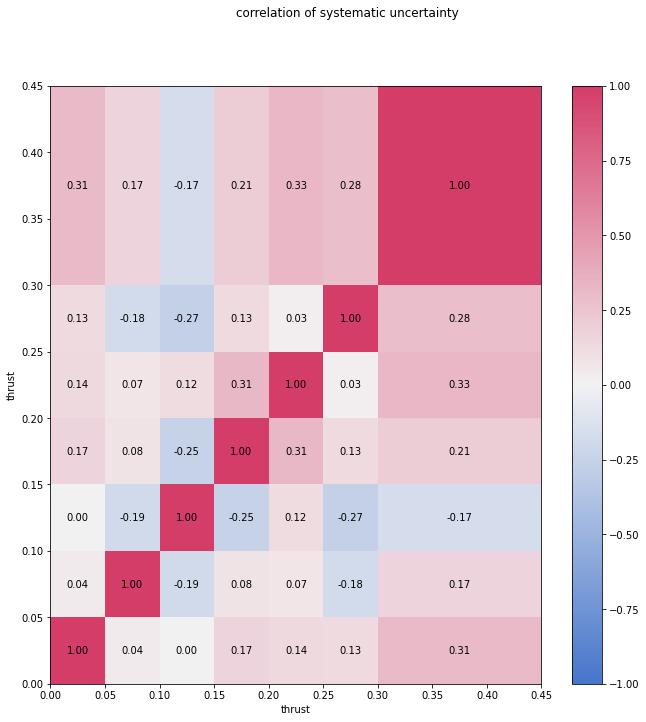

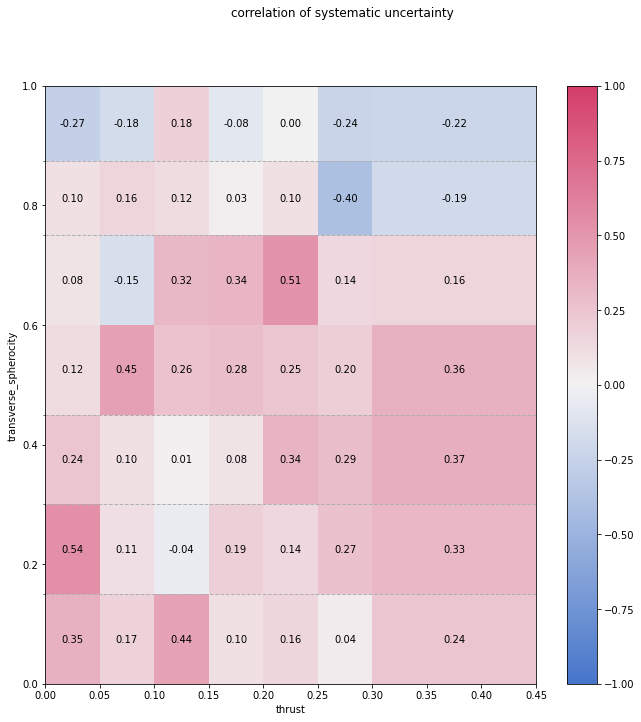

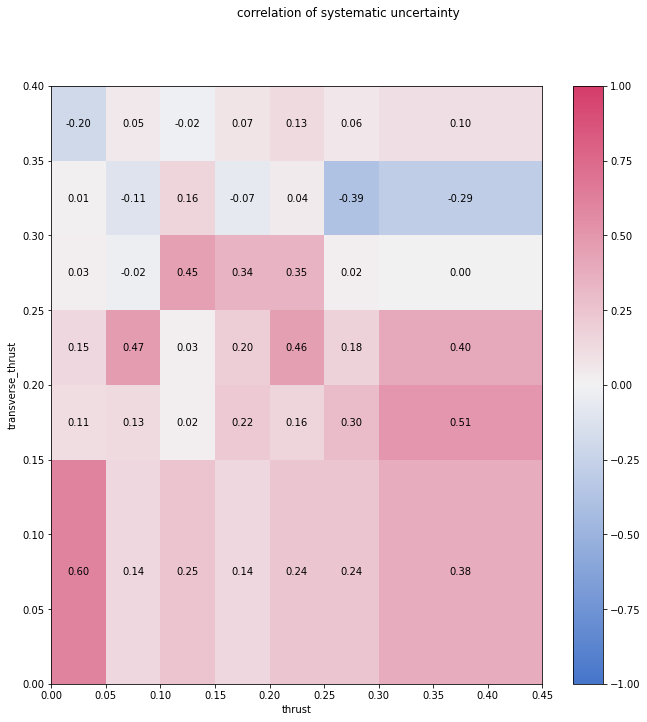

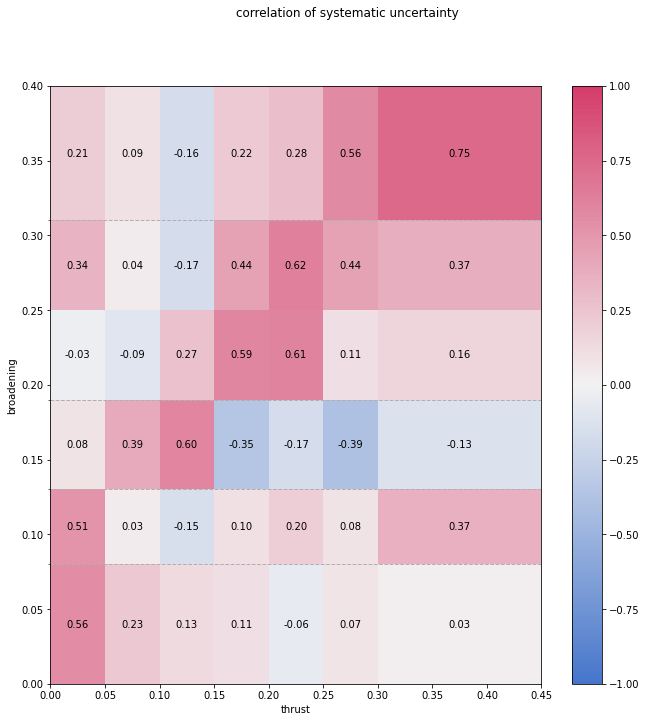

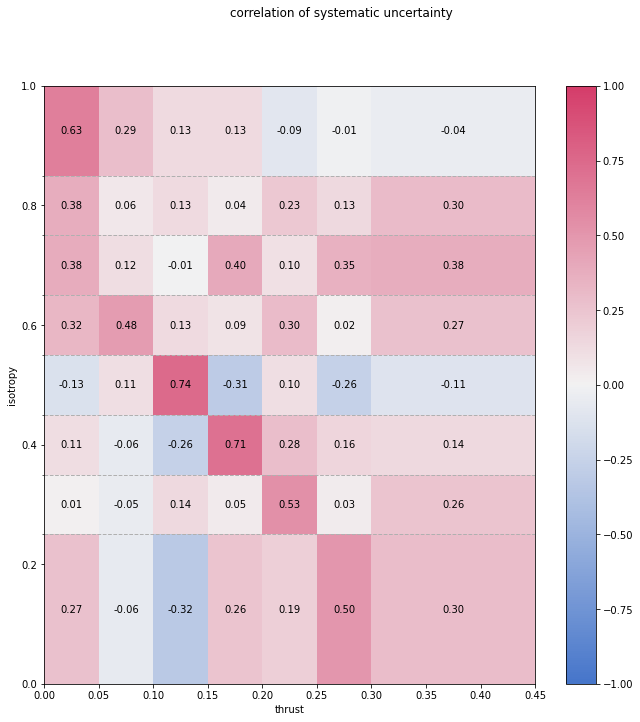

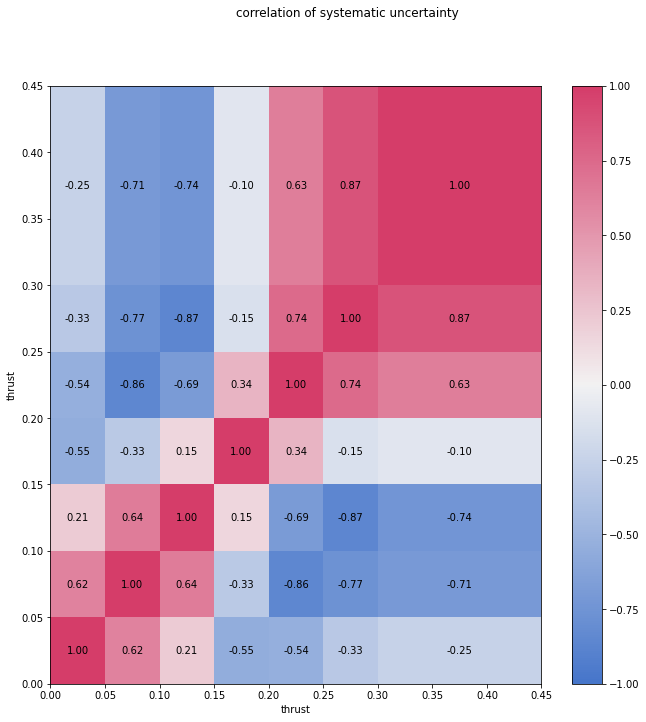

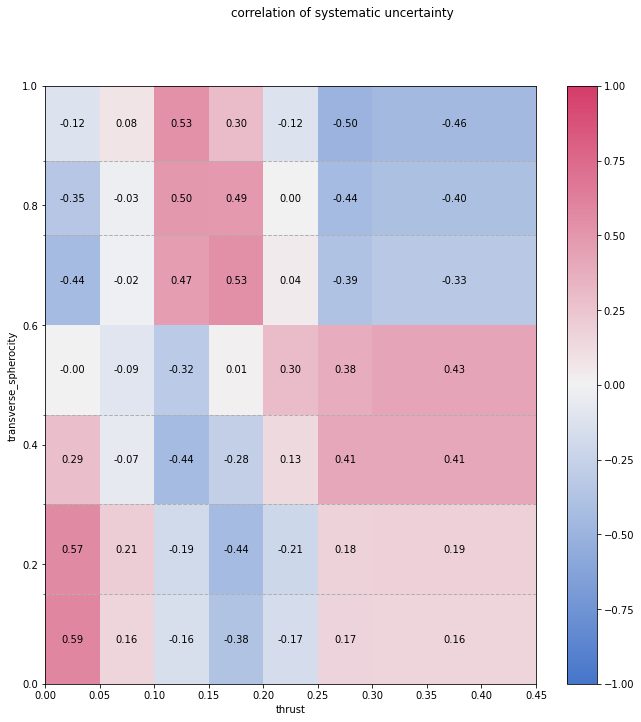

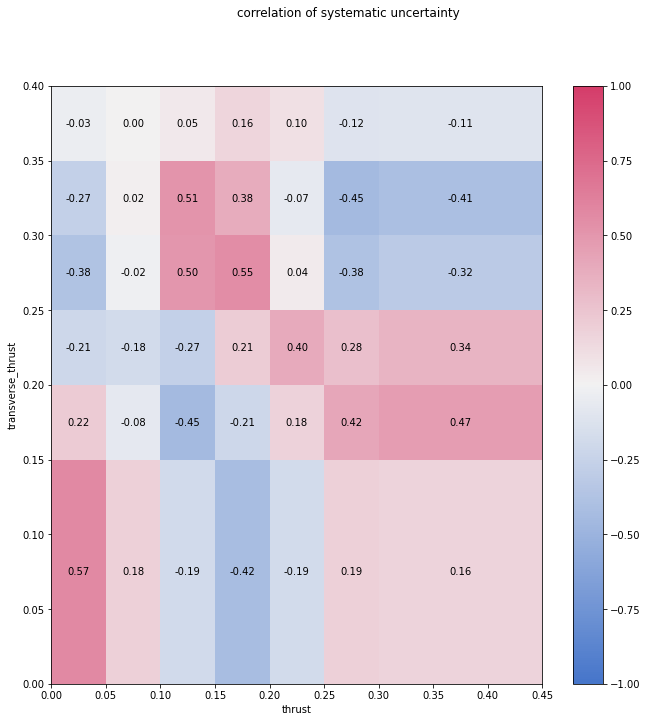

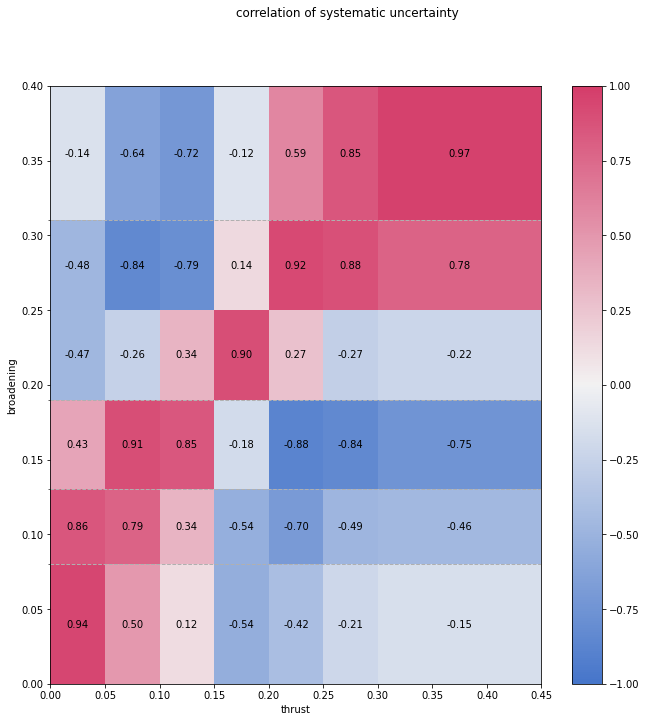

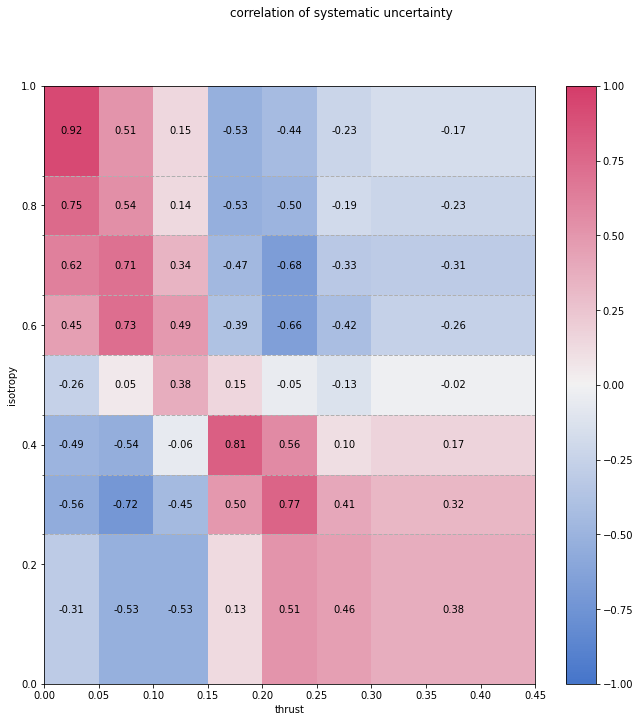

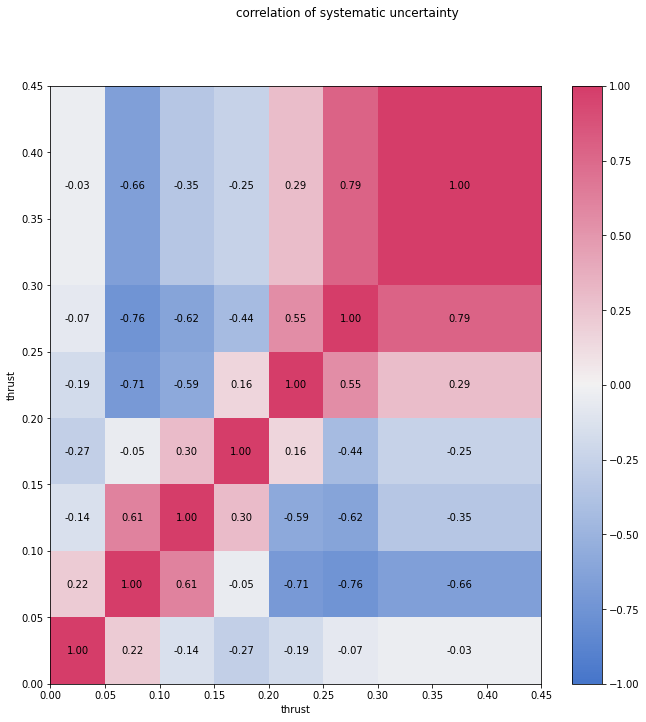

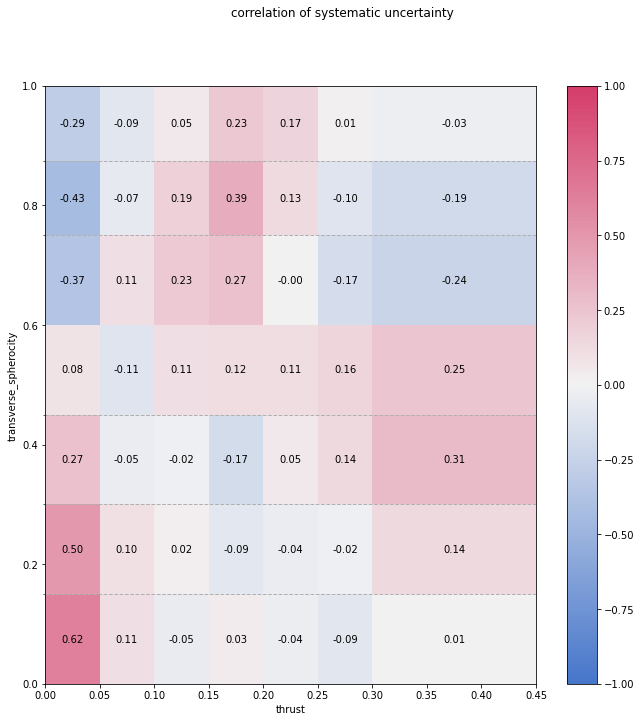

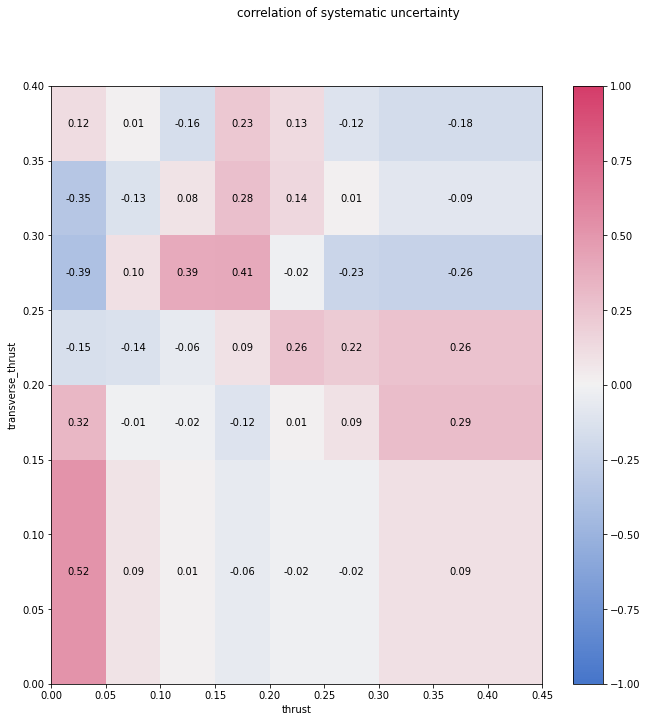

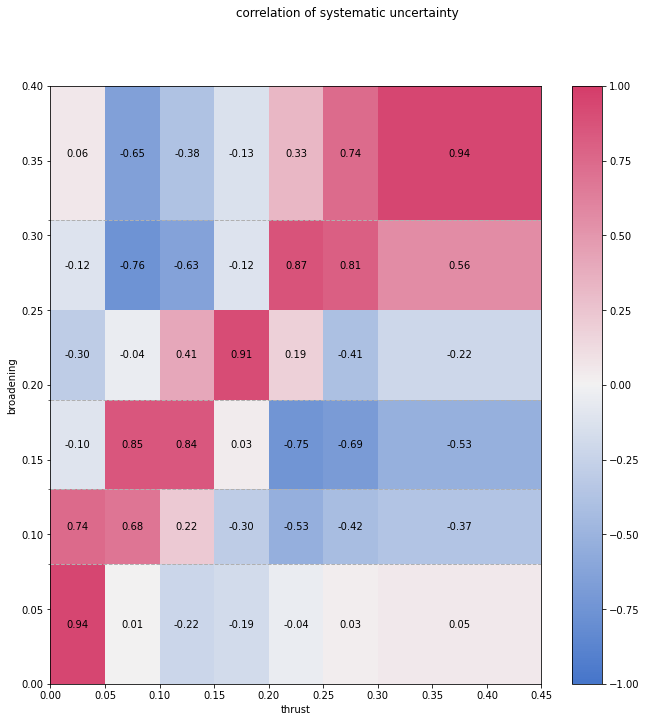

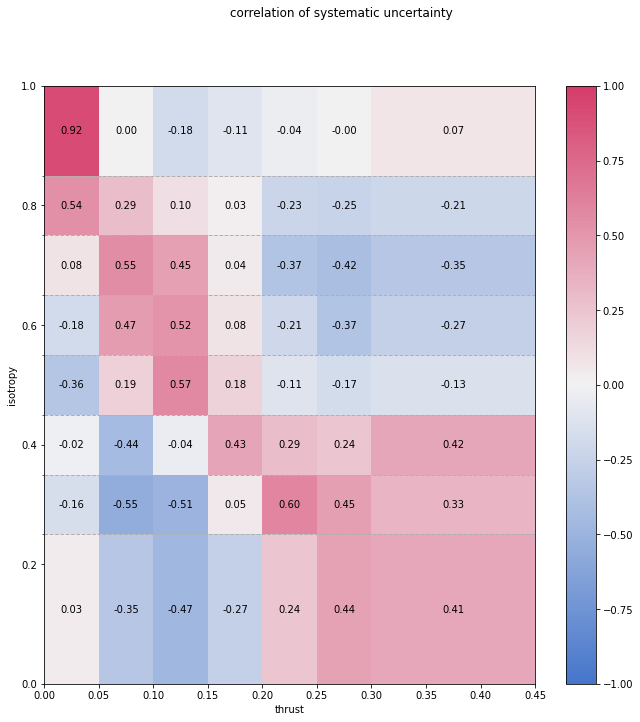

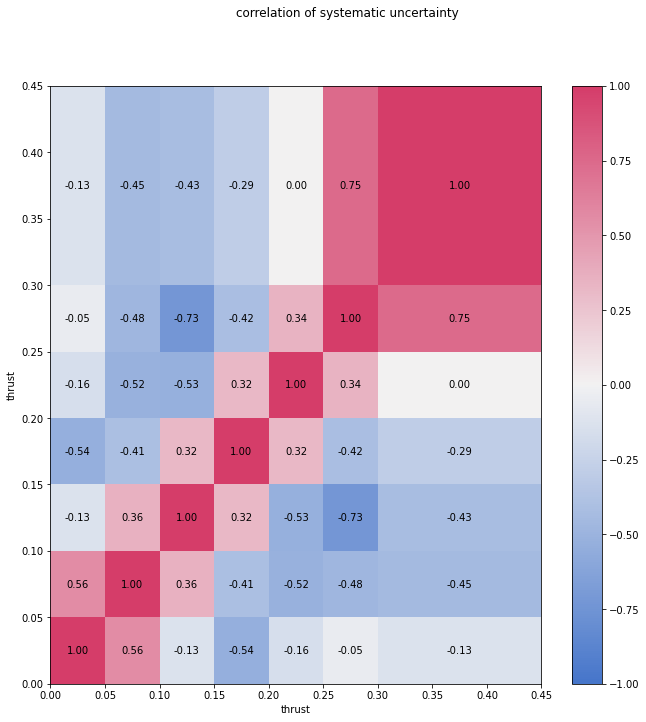

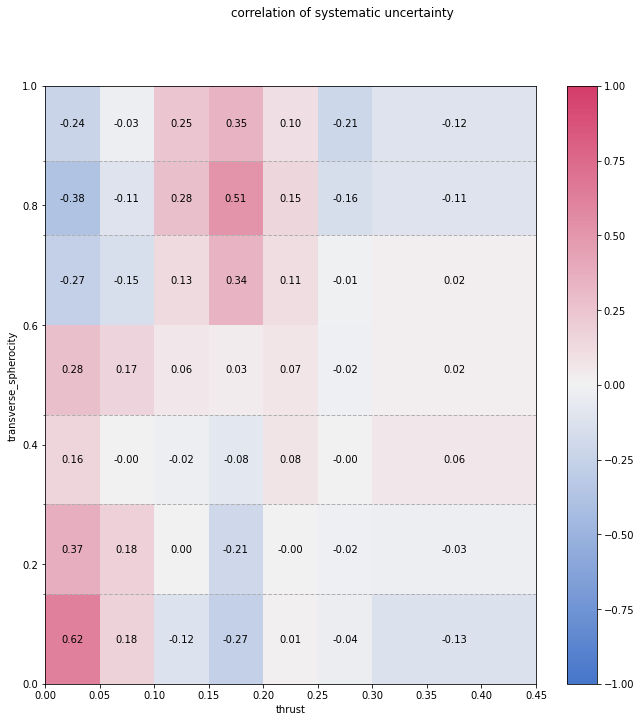

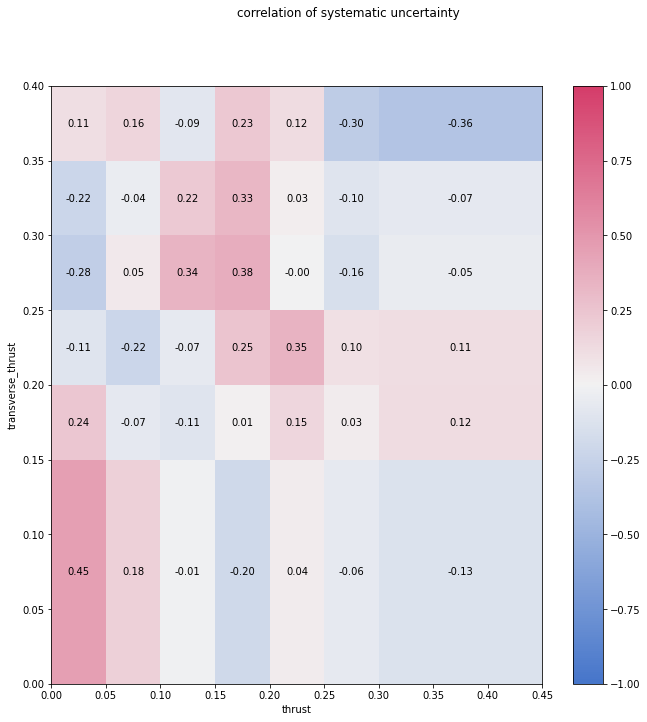

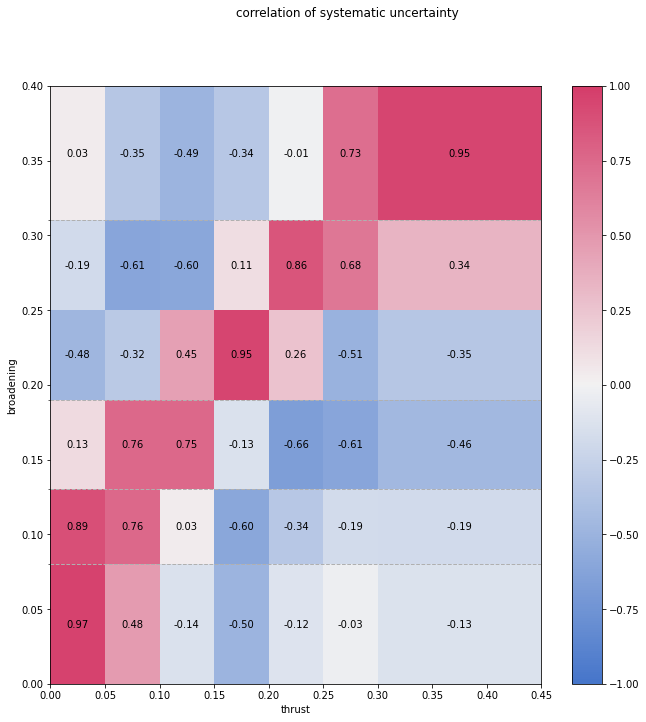

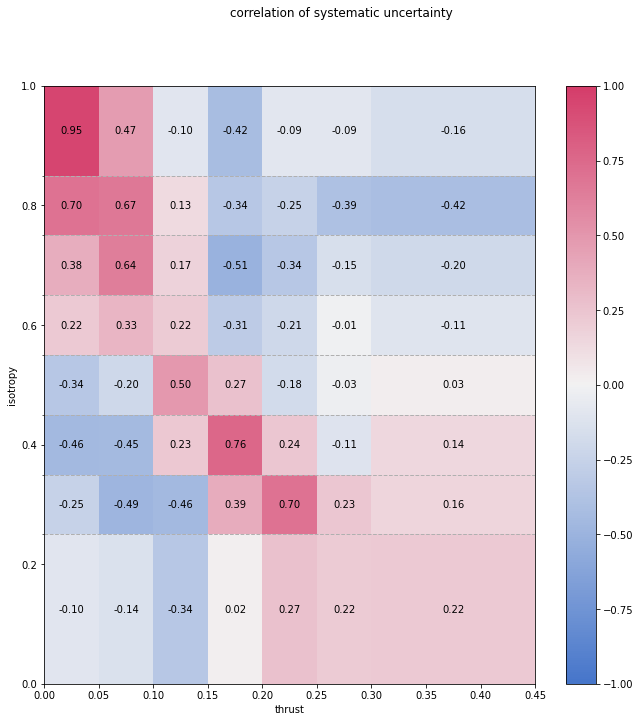

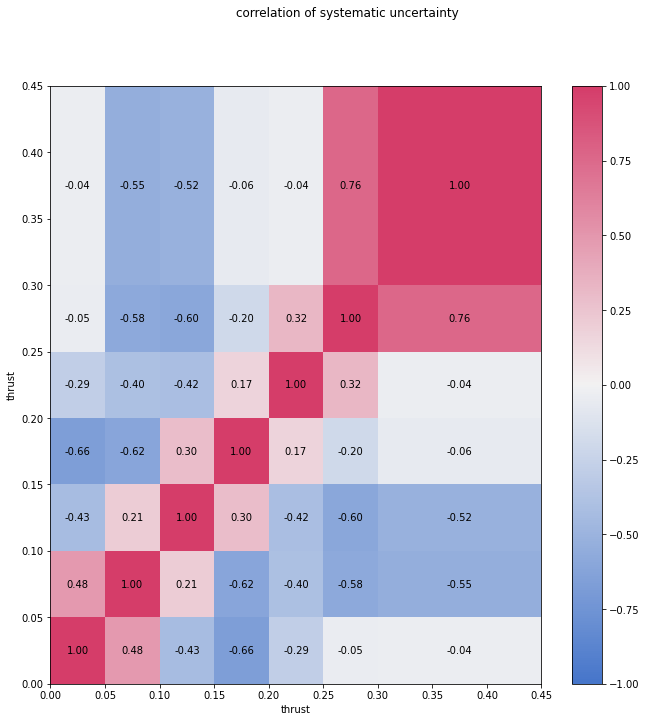

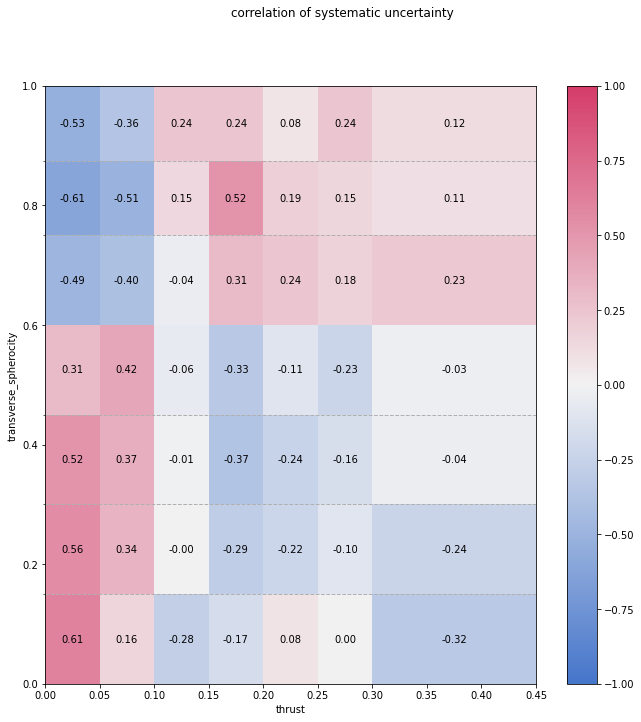

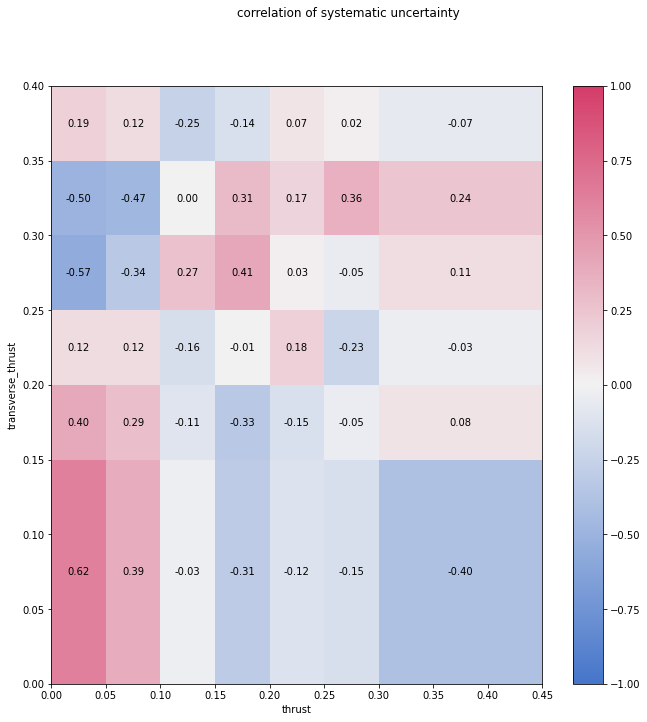

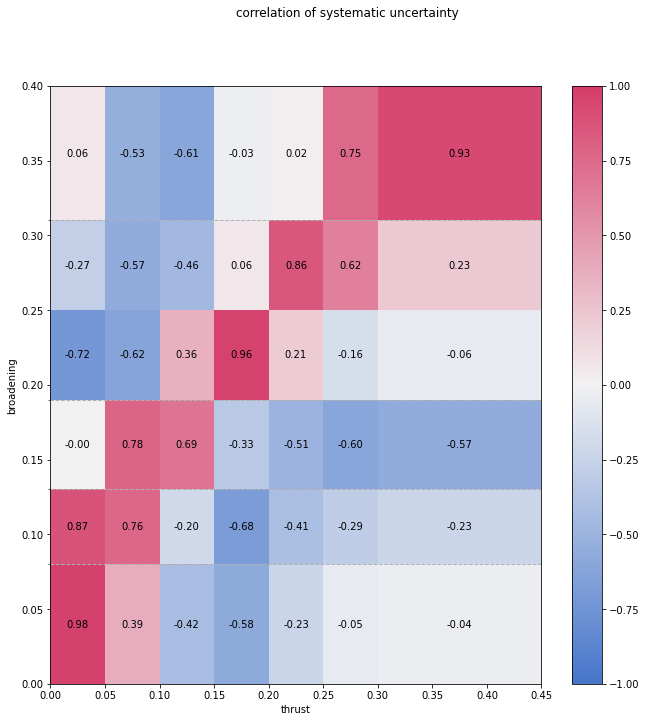

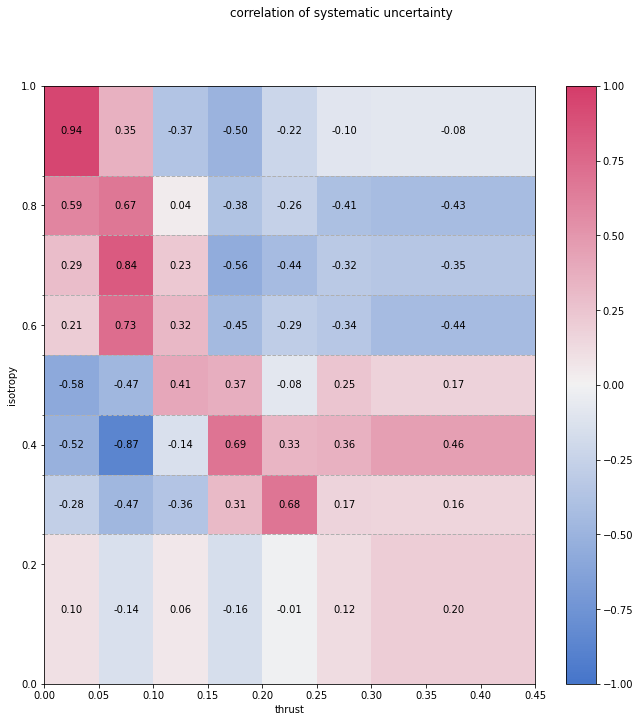

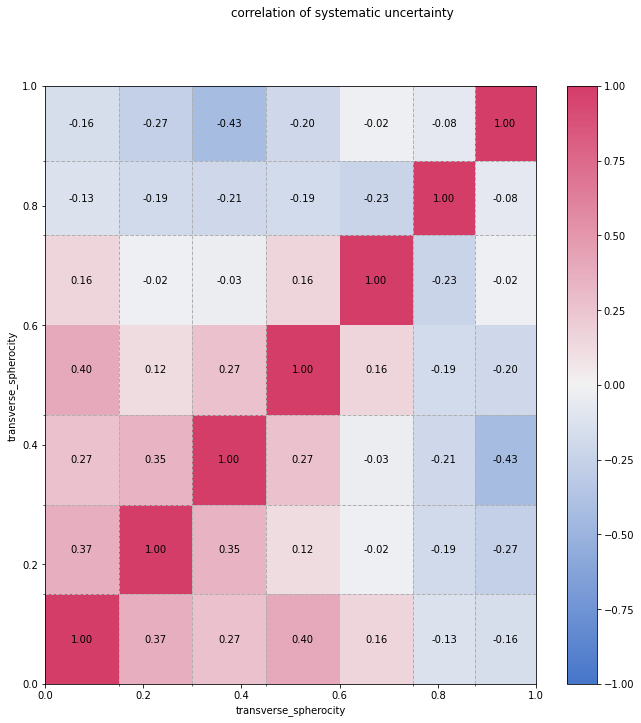

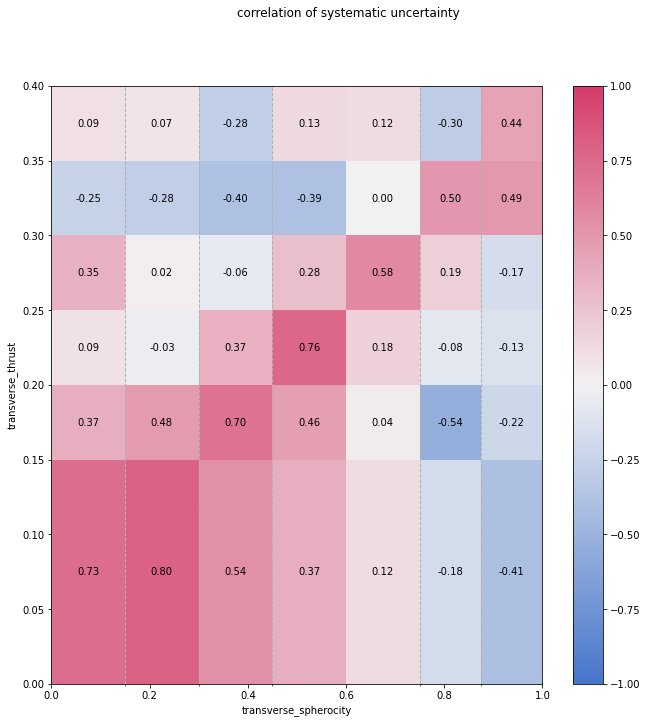

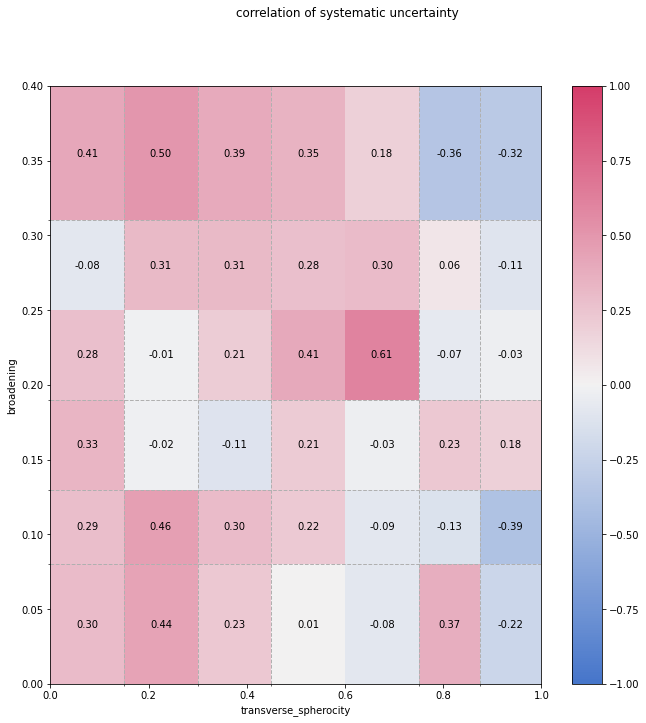

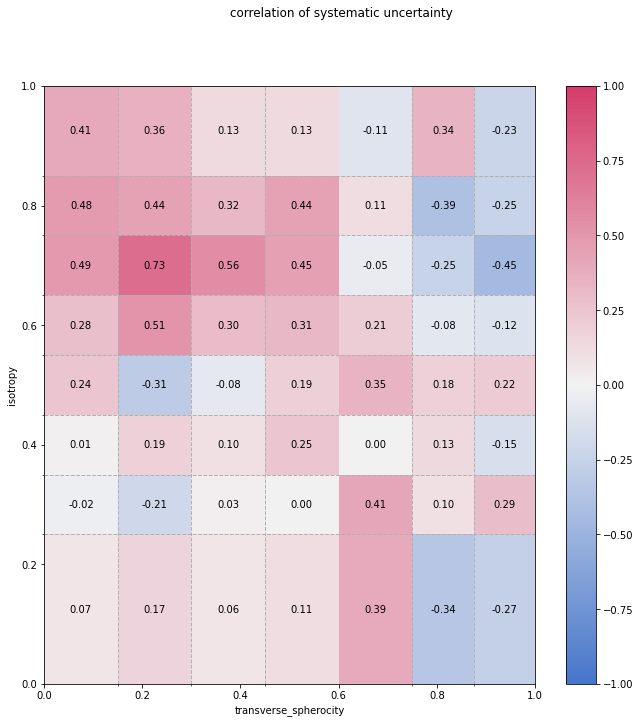

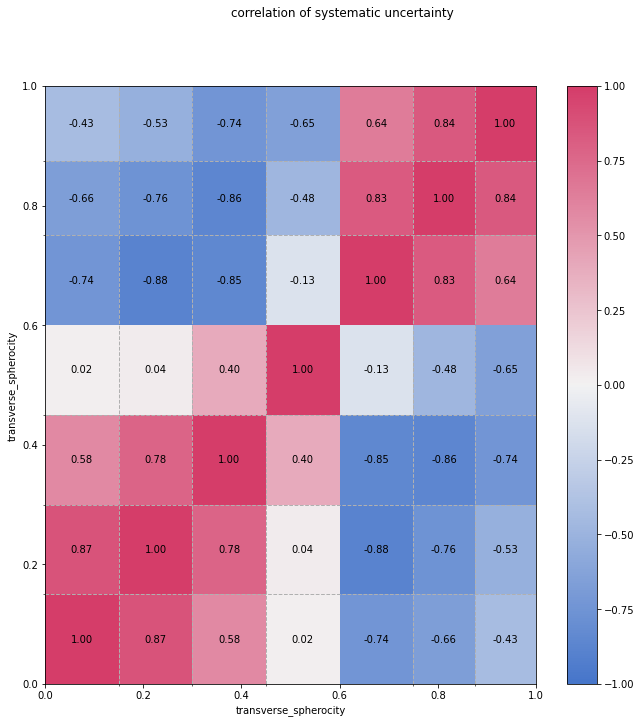

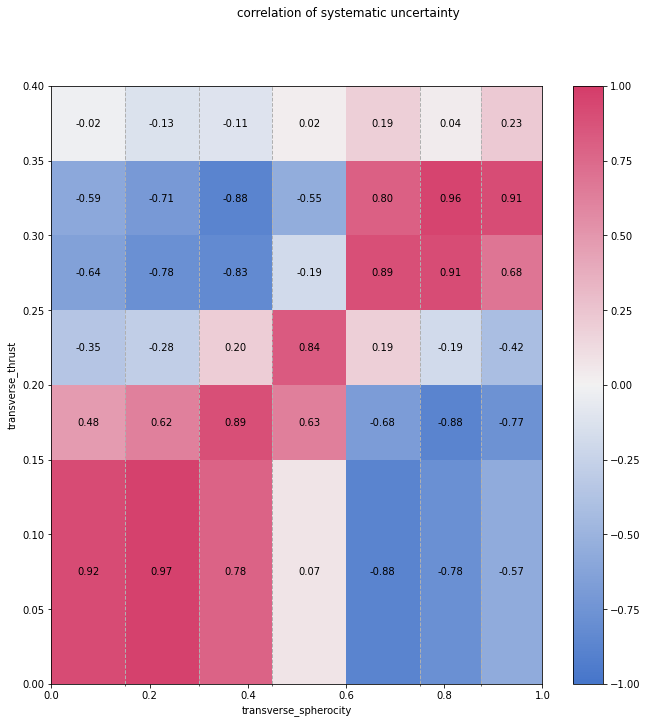

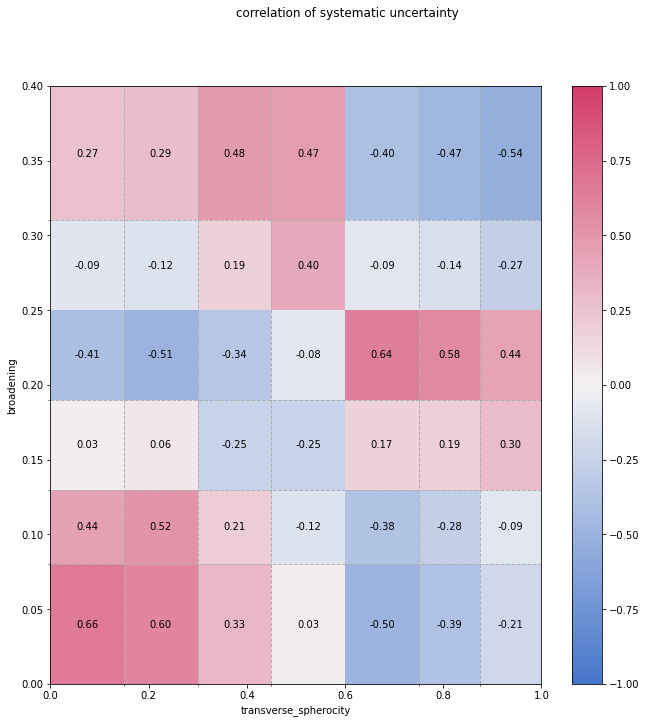

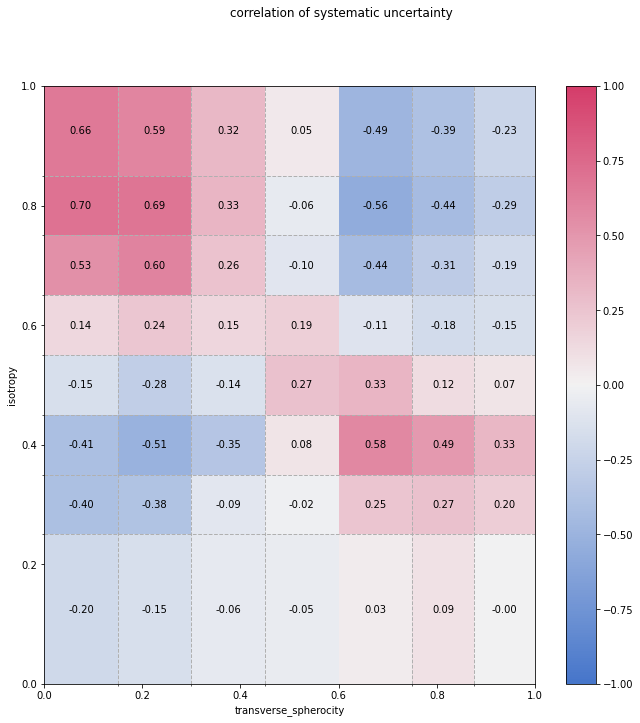

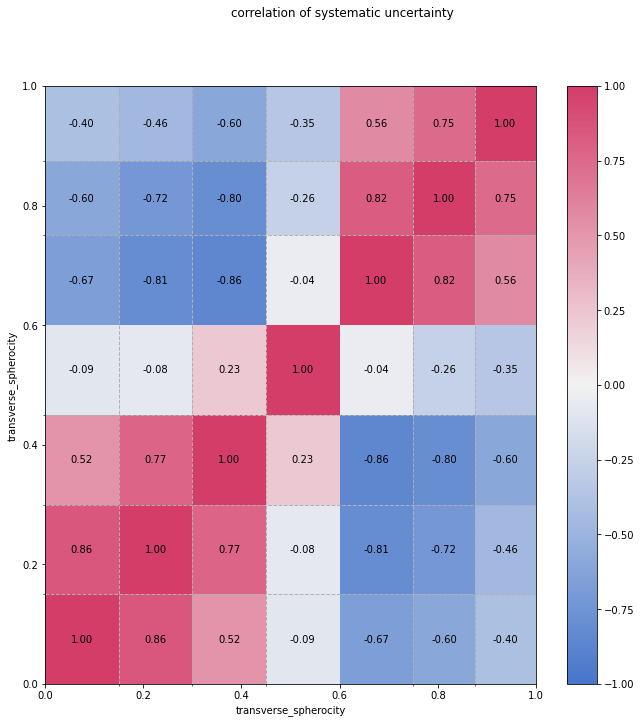

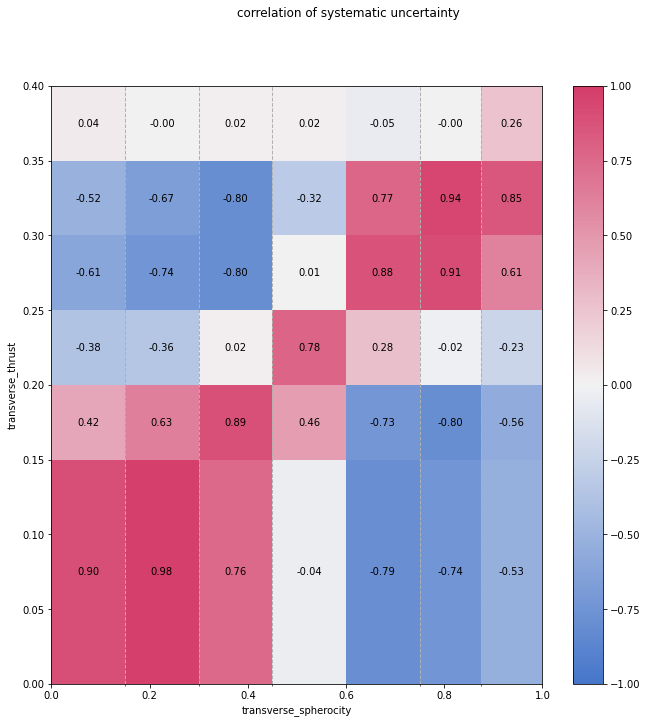

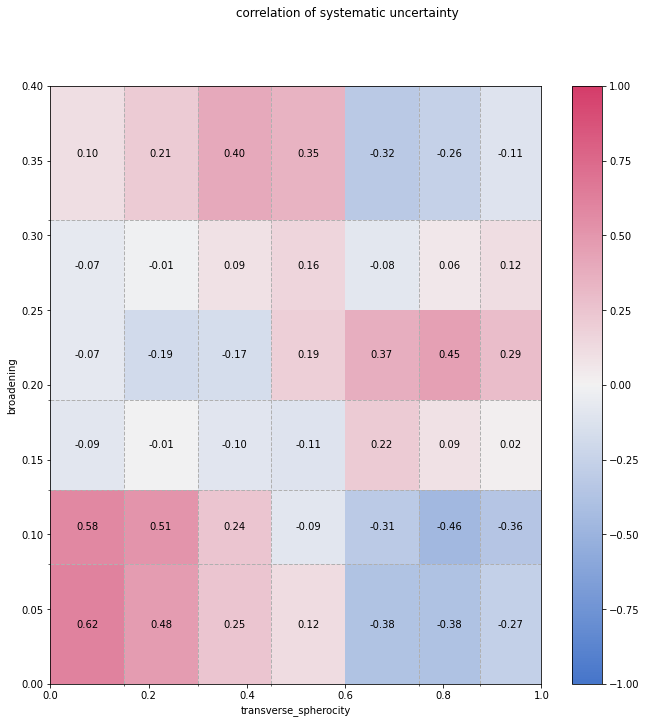

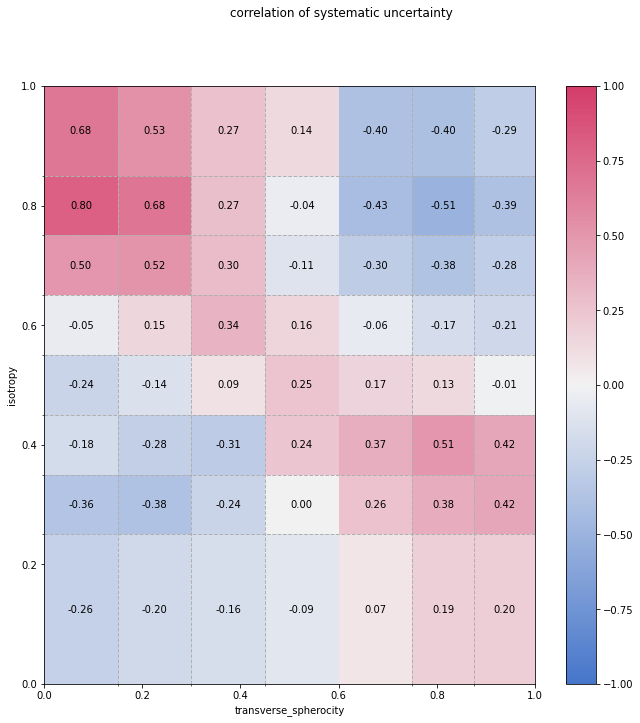

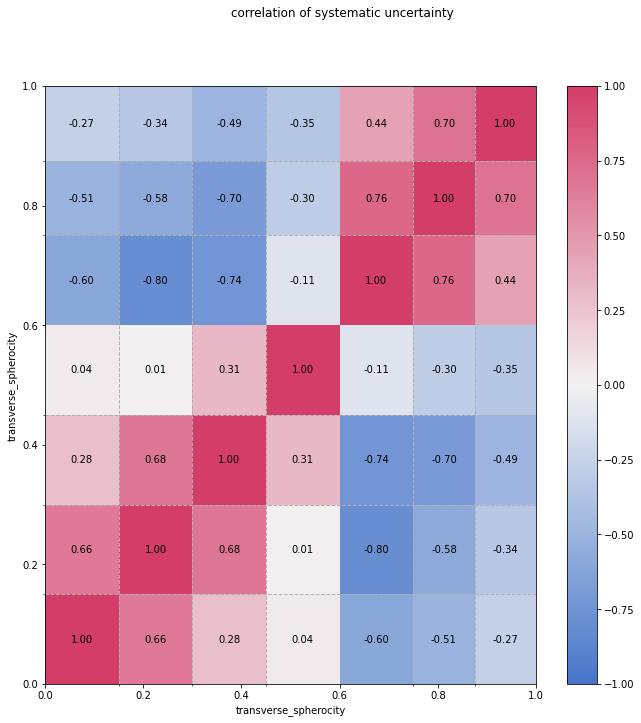

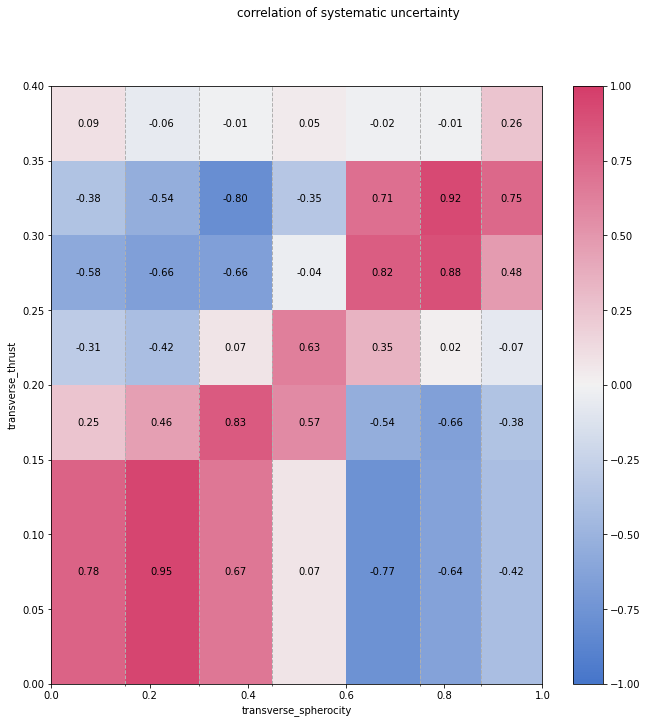

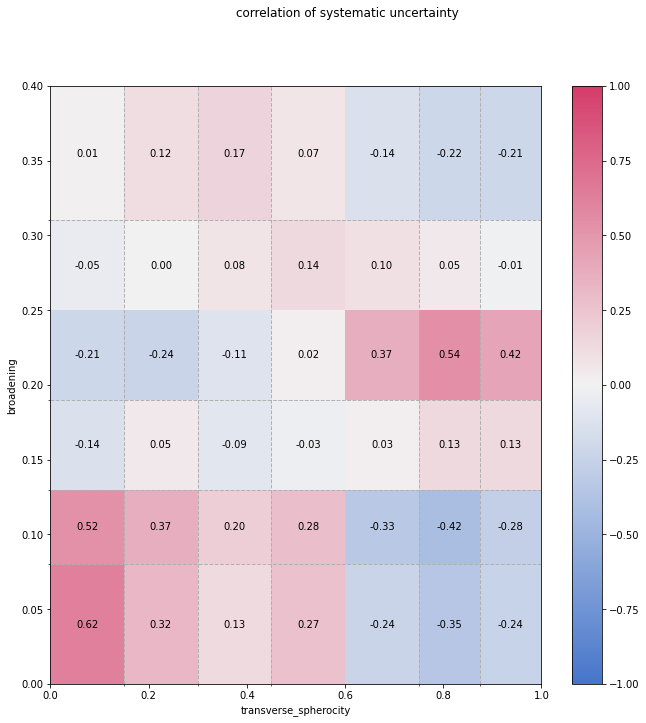

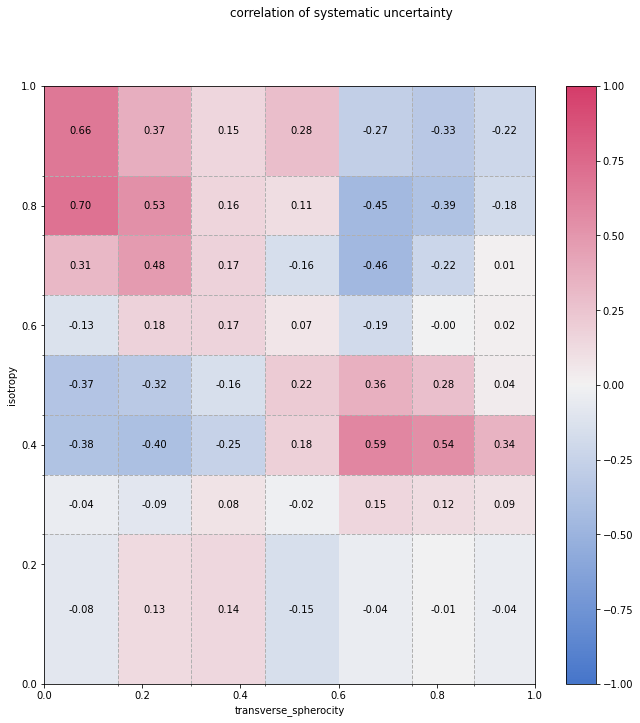

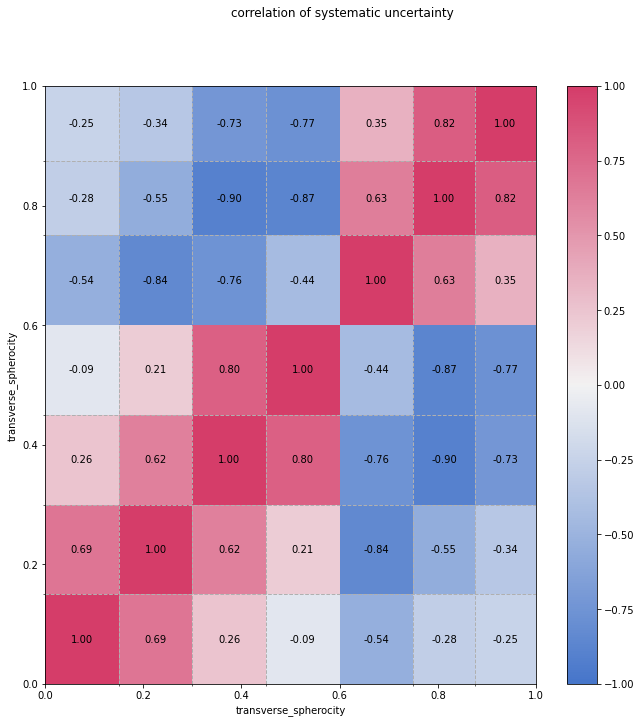

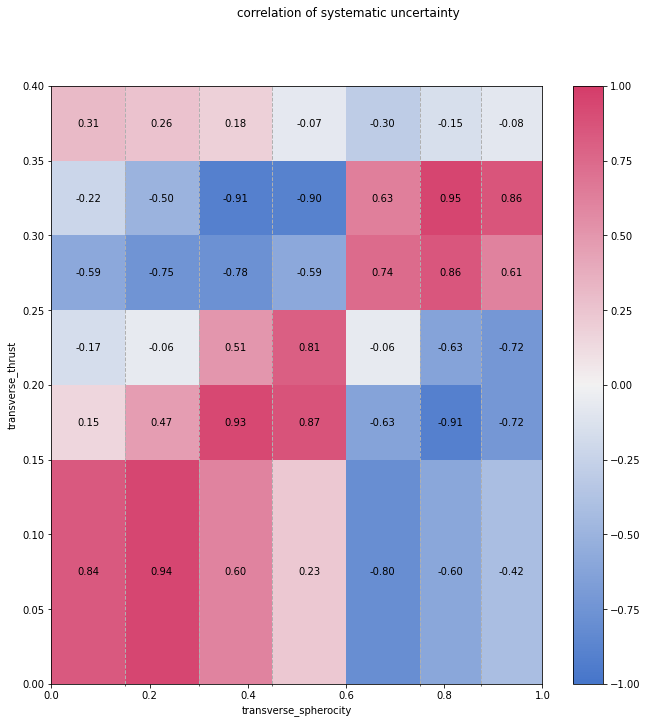

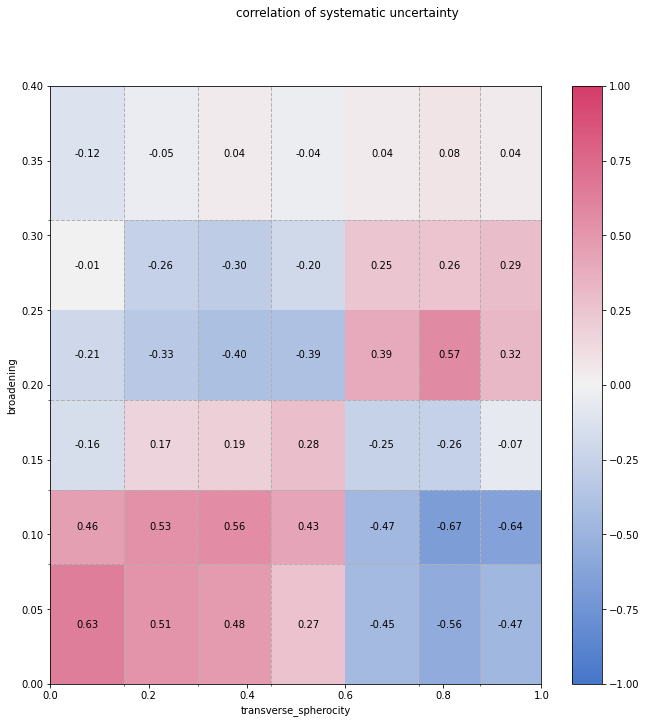

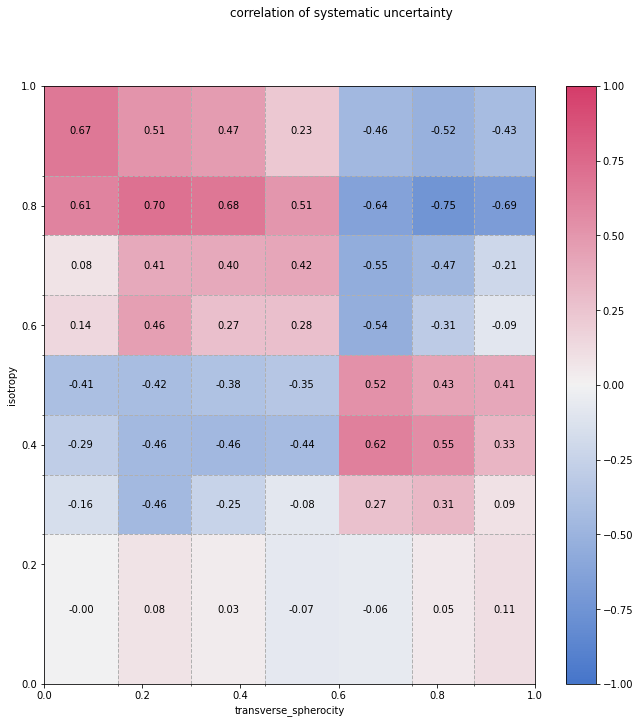

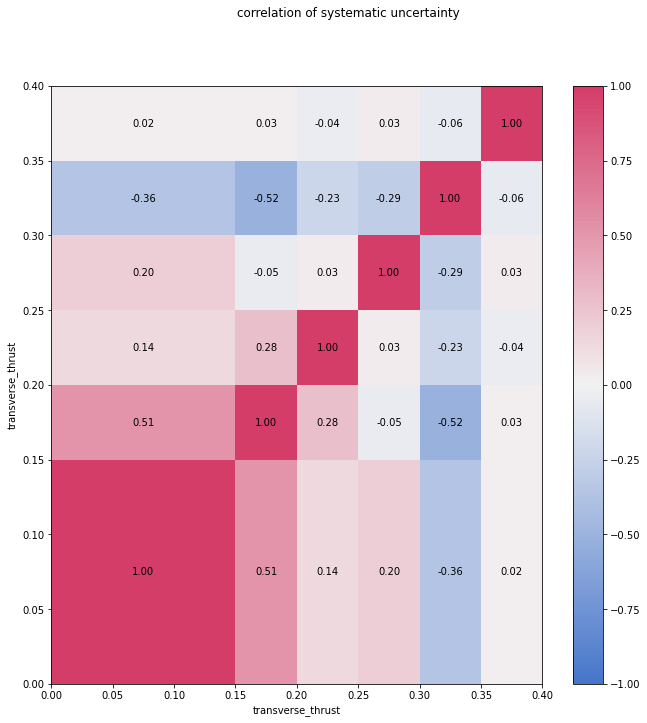

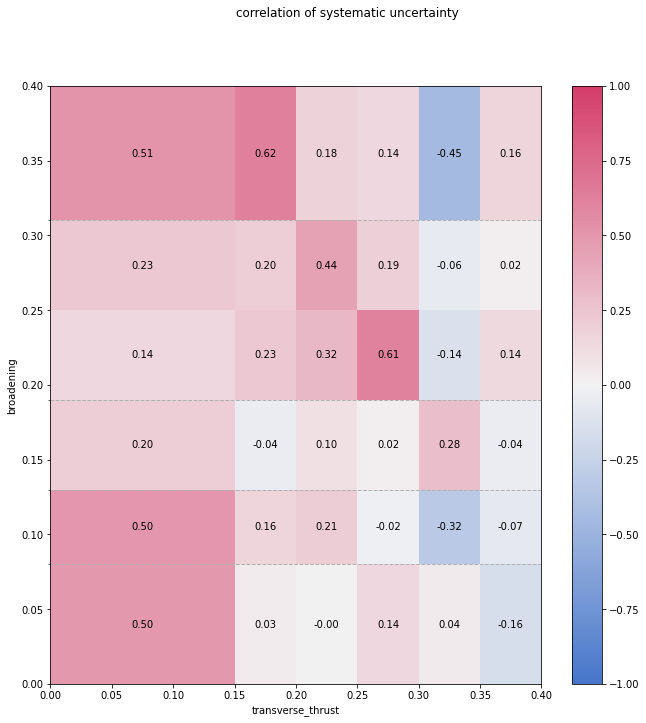

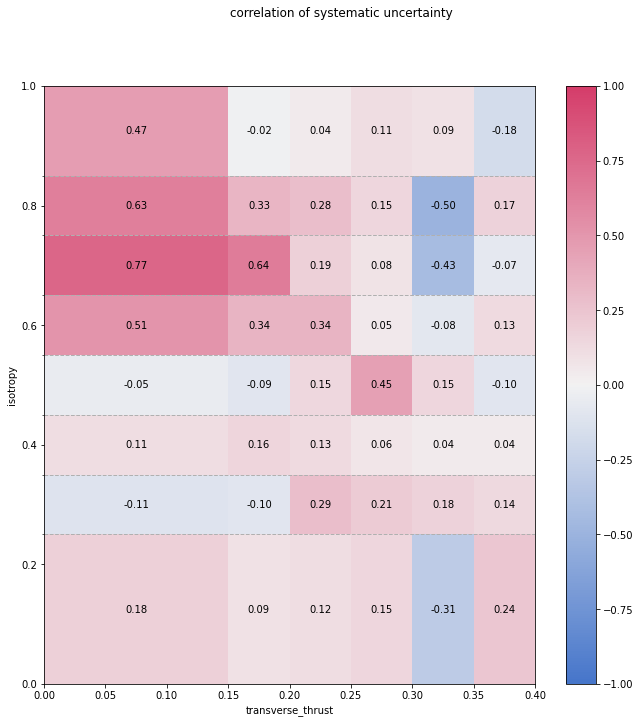

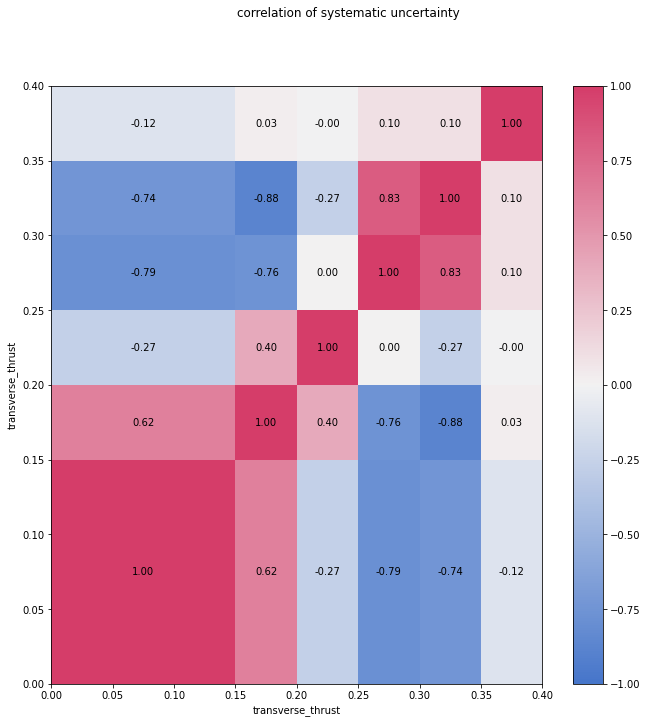

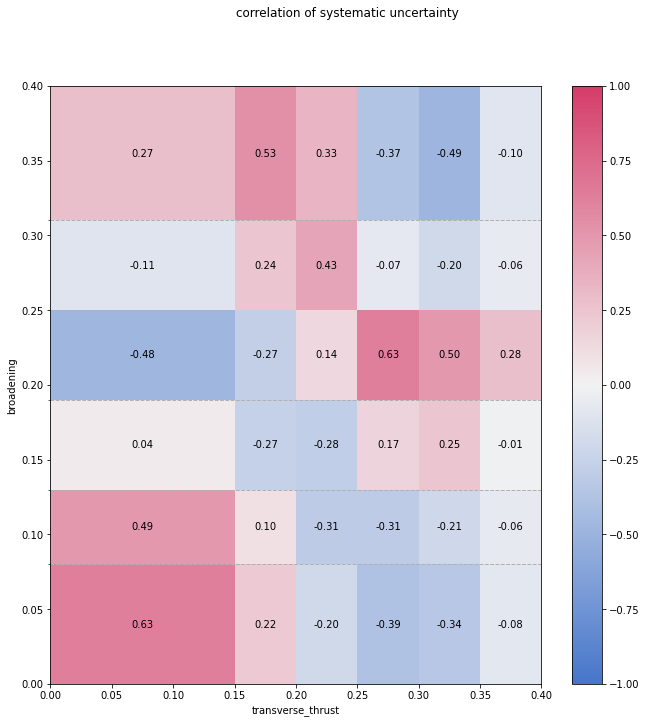

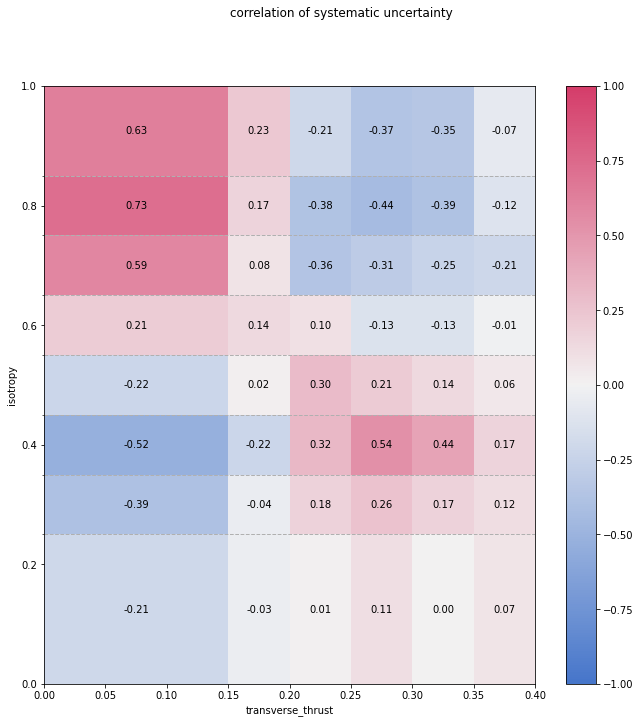

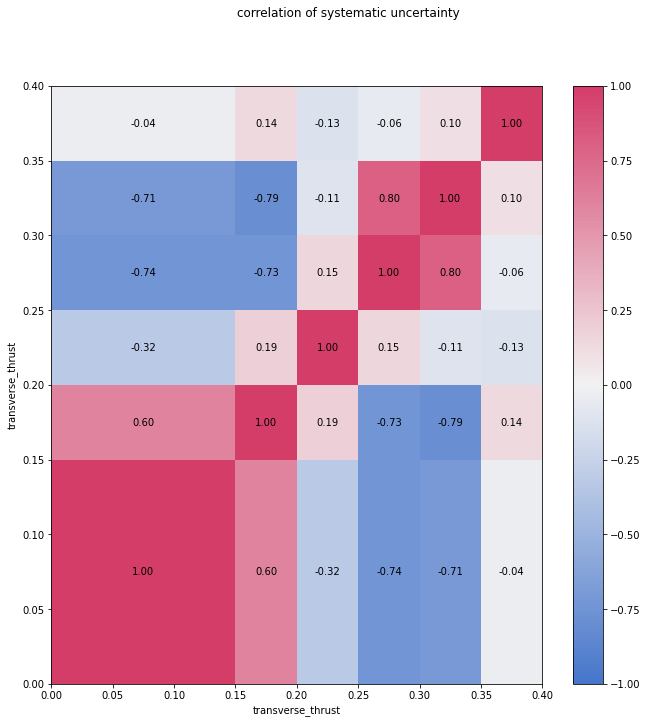

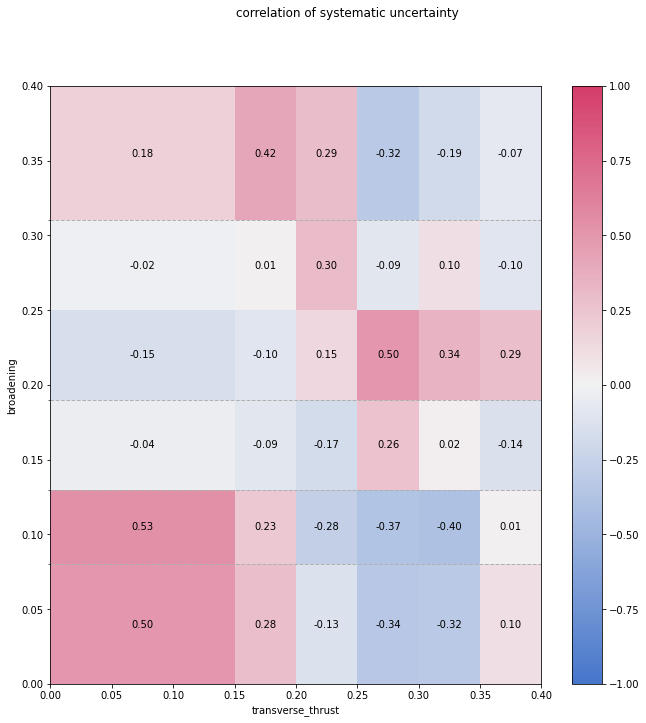

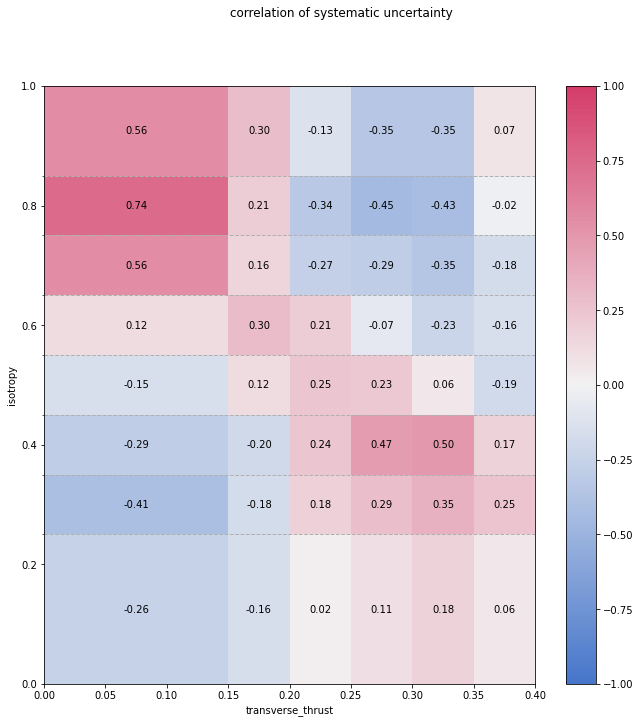

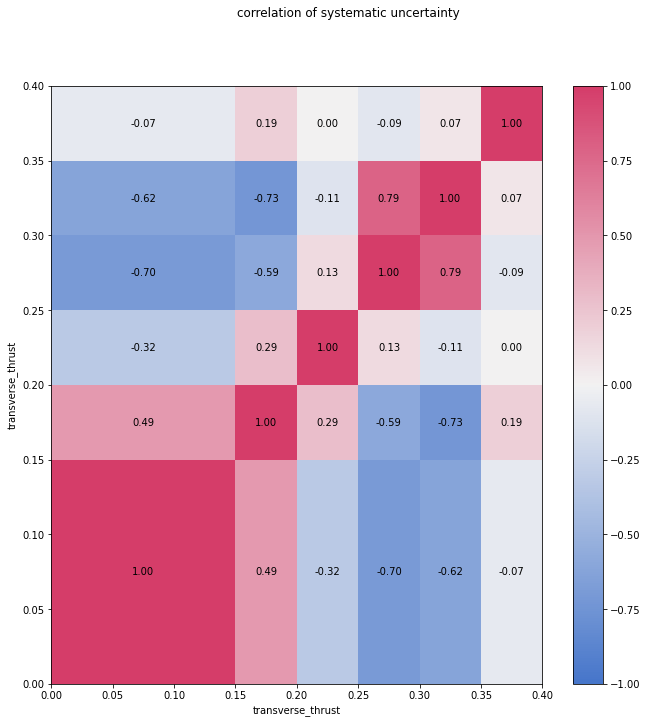

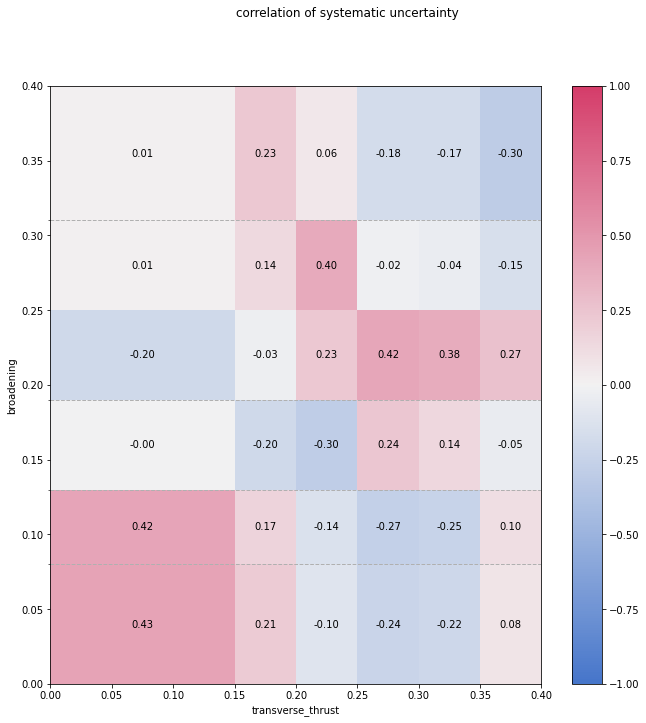

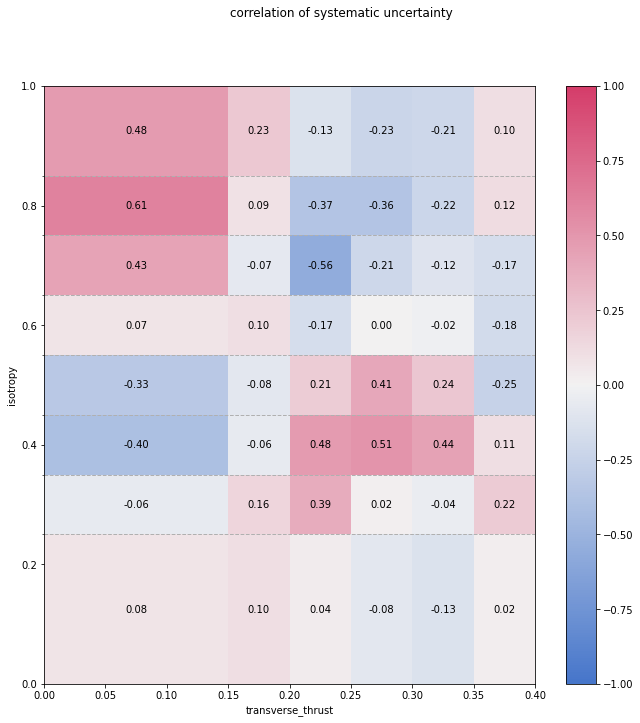

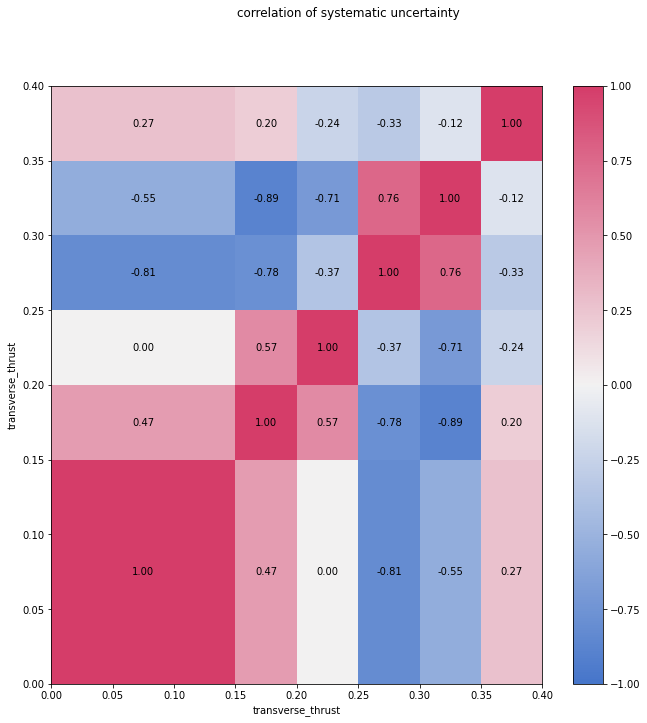

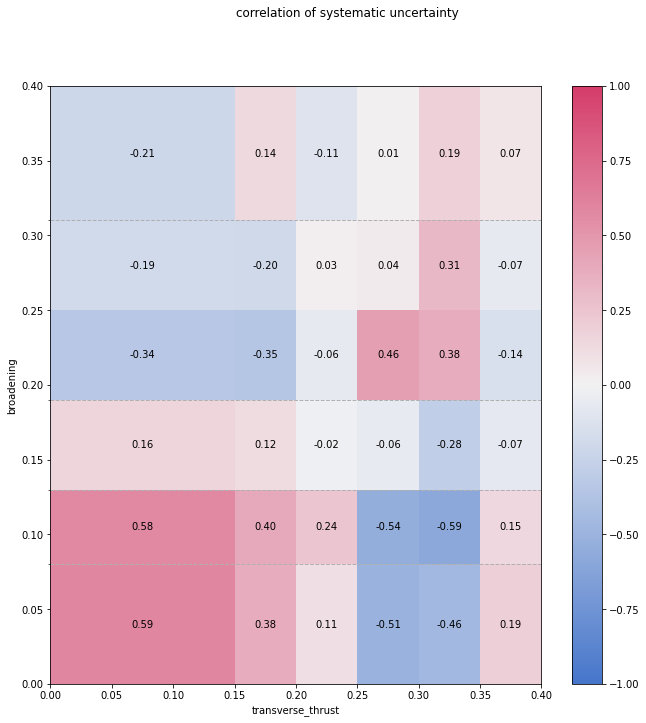

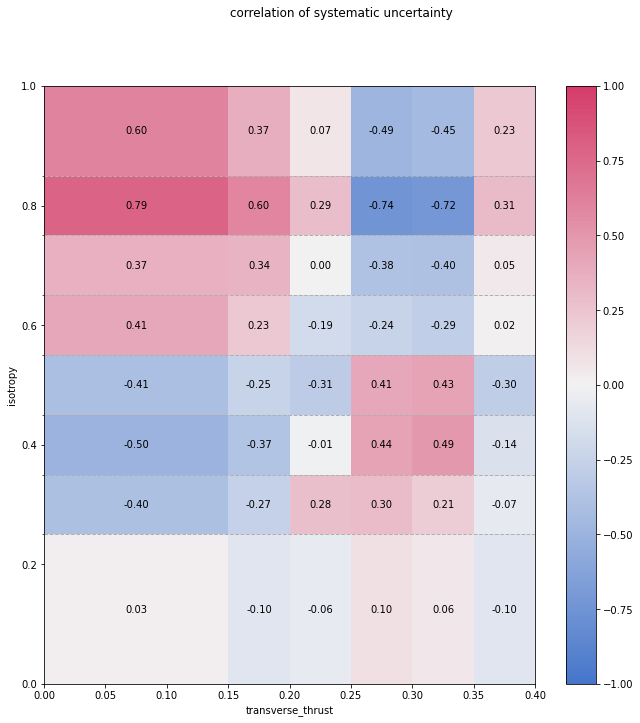

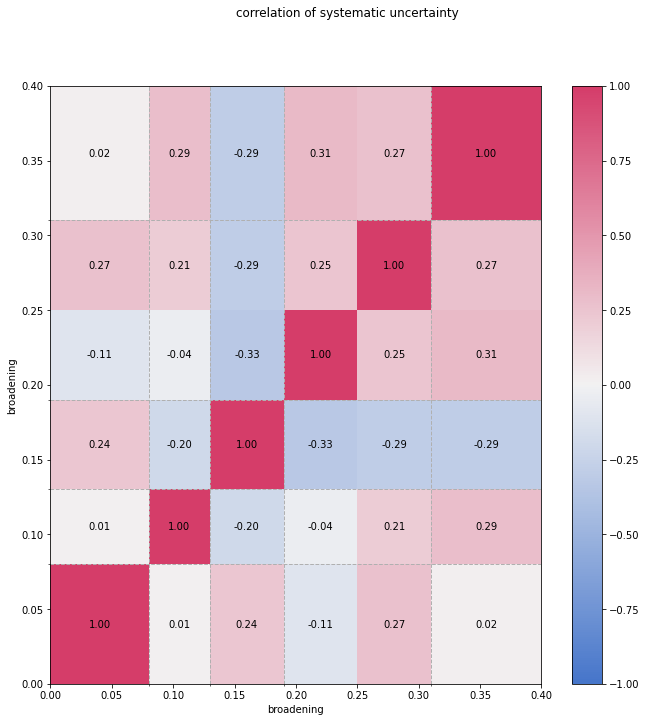

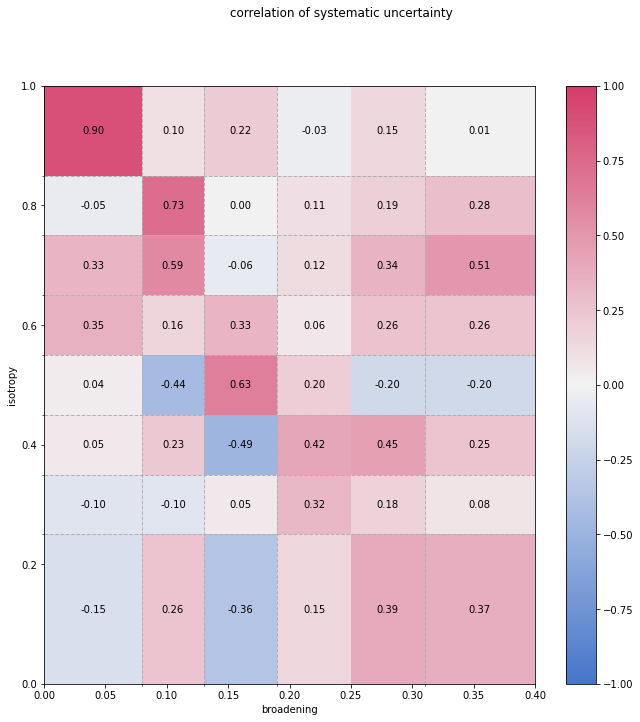

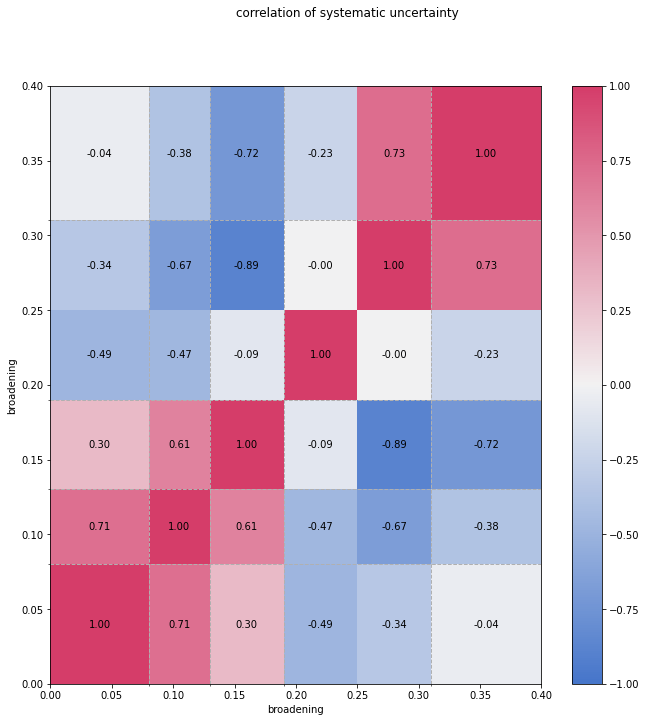

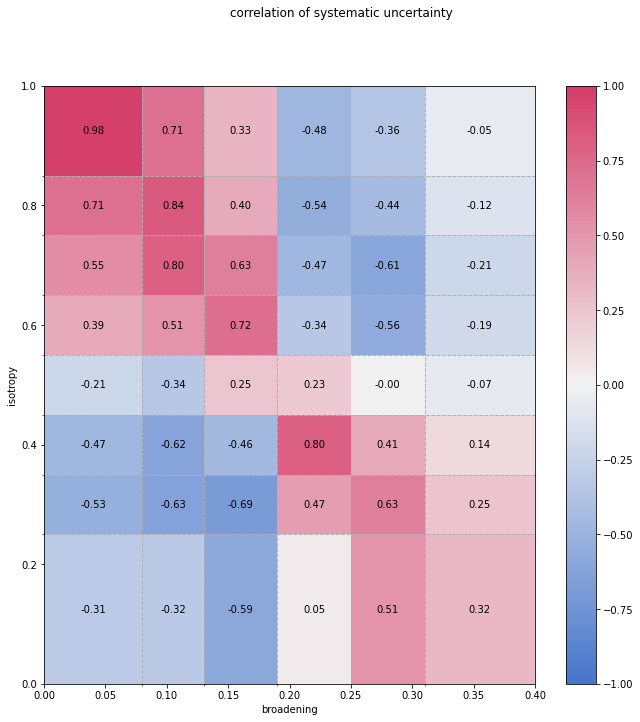

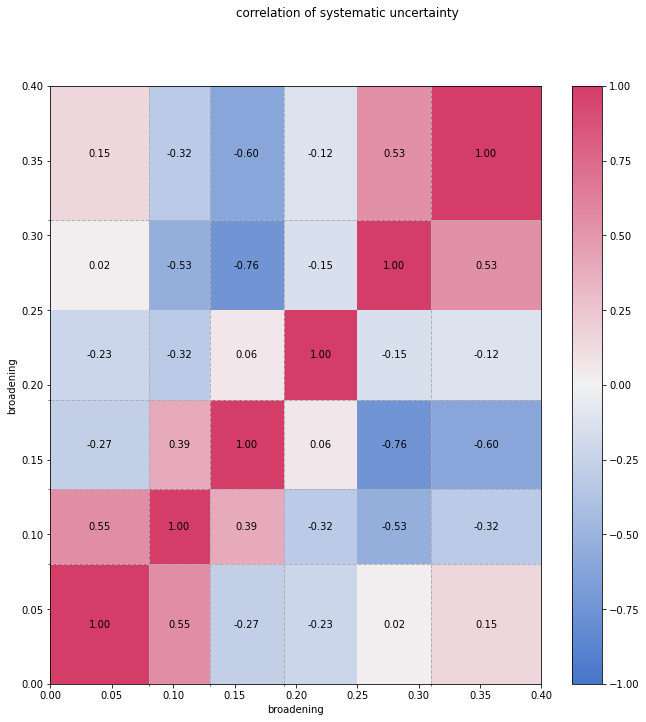

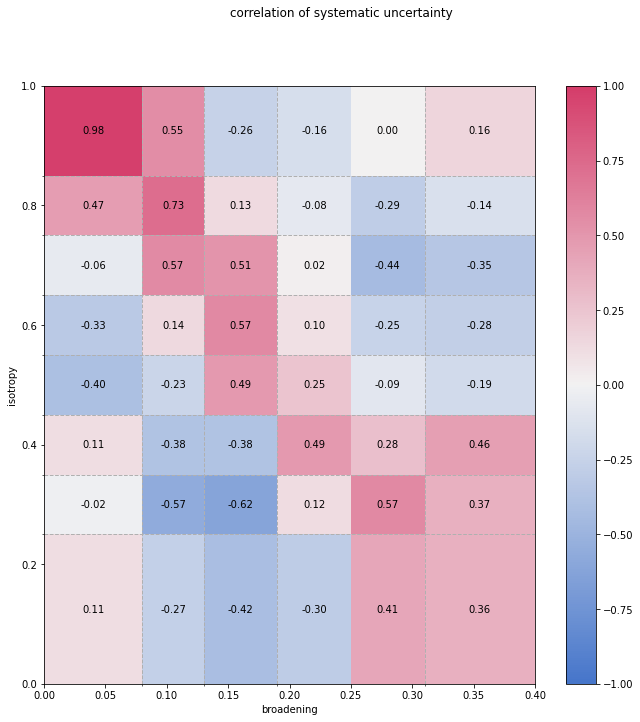

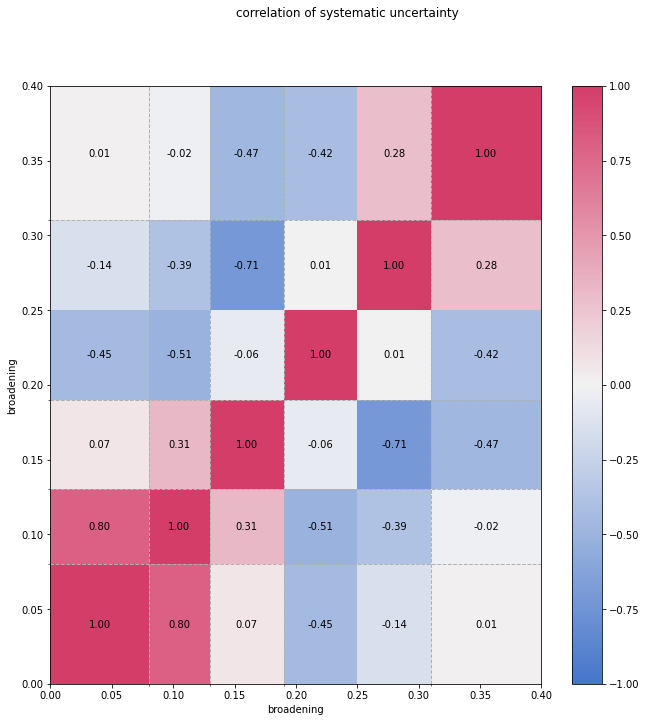

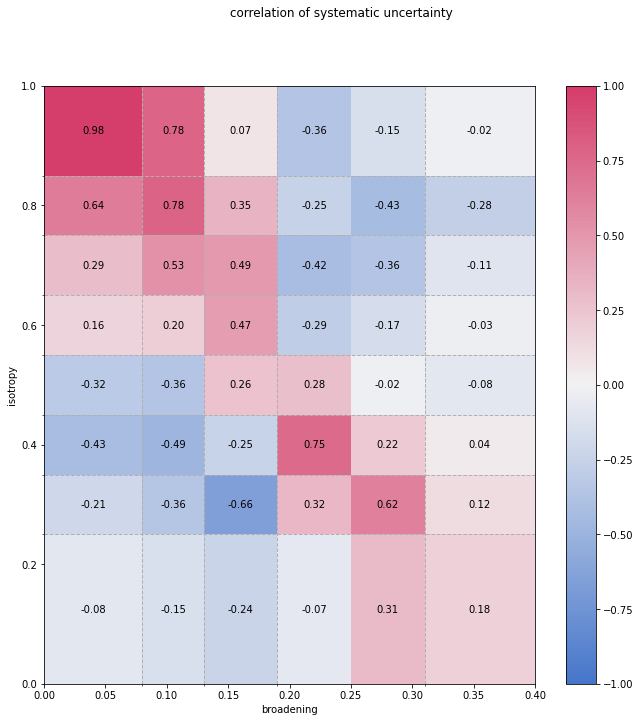

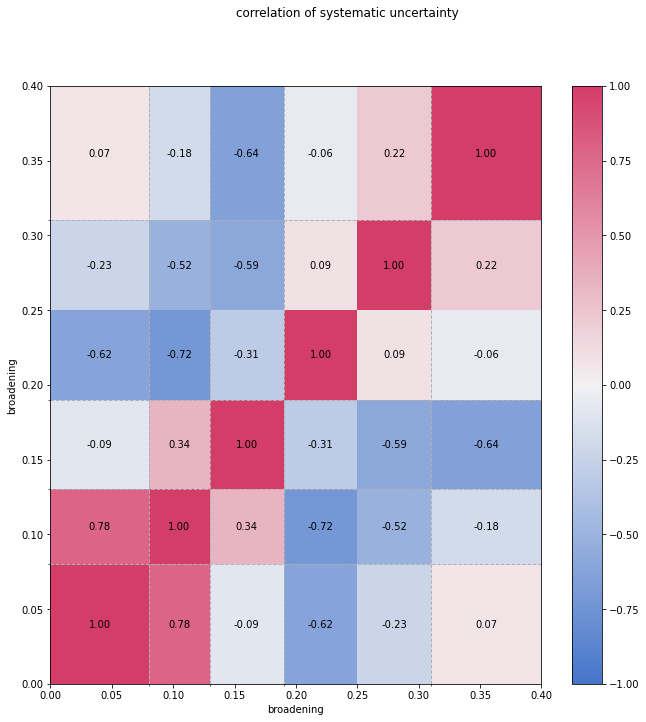

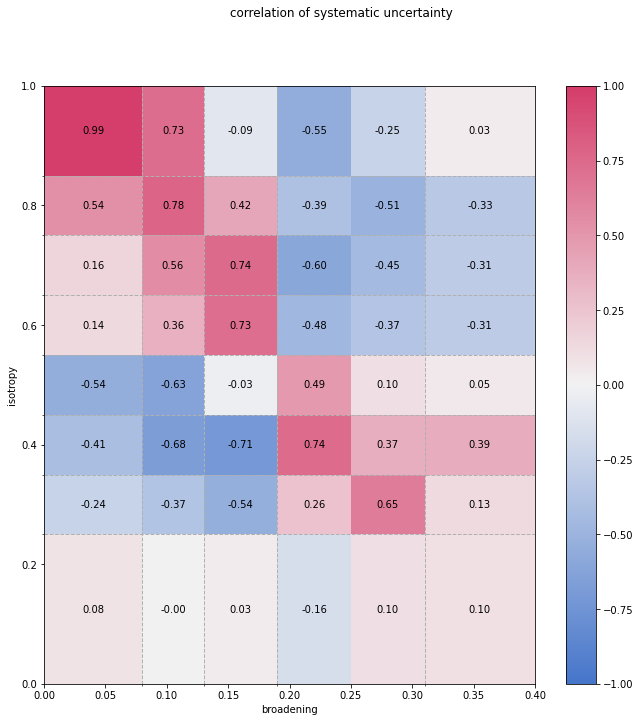

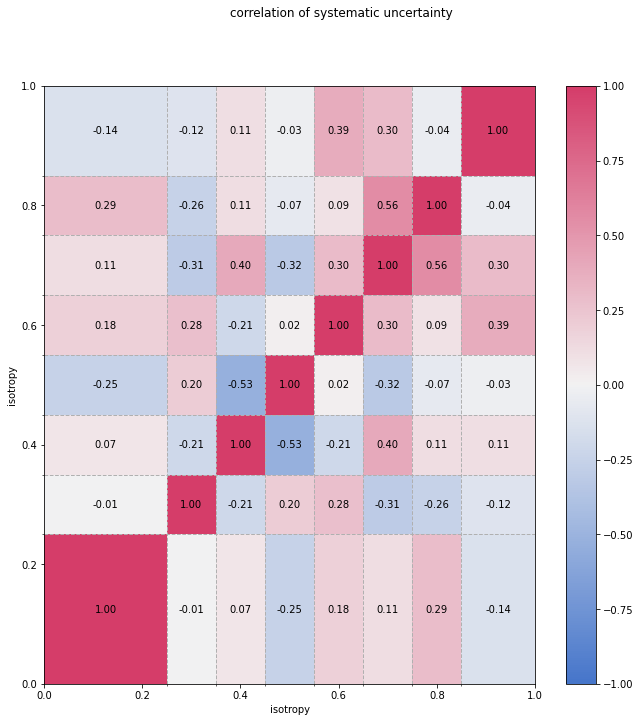

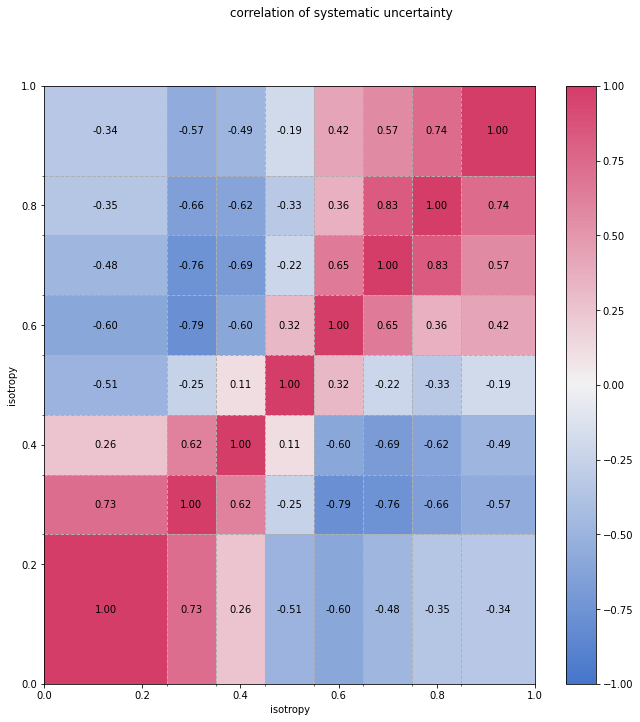

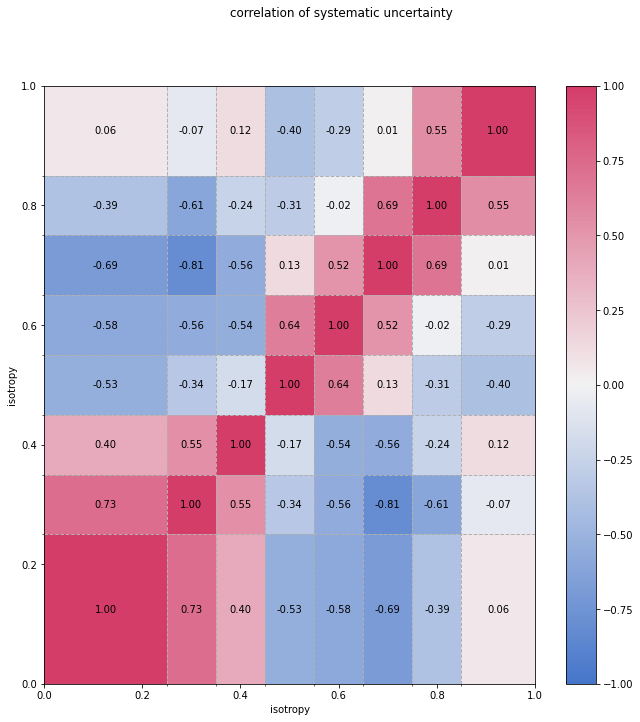

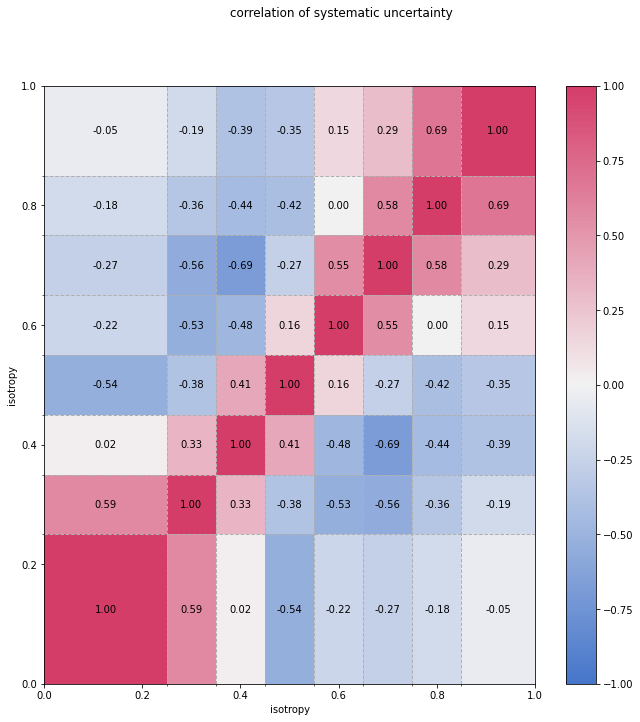

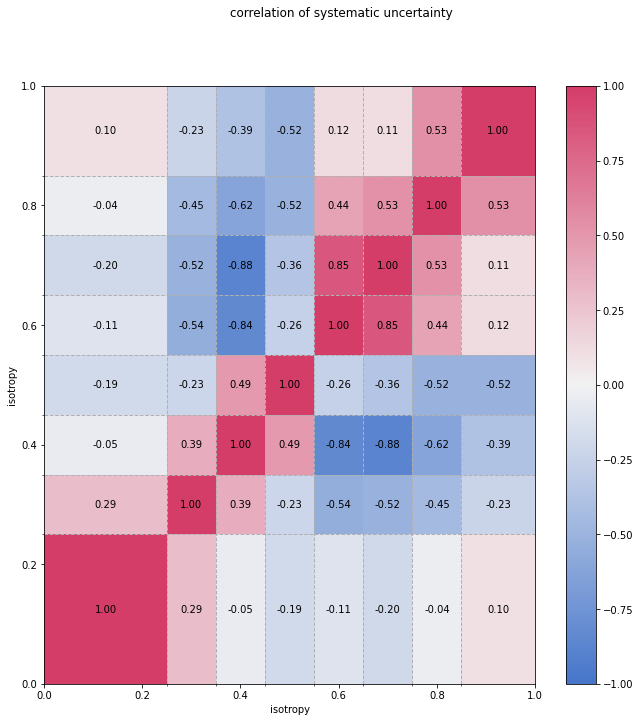

In [147]:
for _,entry in df[df['histtype']=='correlation'].iterrows():
    plot_corr(entry,outdir = './')

In [151]:
plot_corr(entry,outdir = './')